In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

### Read the data as an appropriate Time Series data and plot the data.

In [3]:
df=pd.read_csv("C:/Users/2261092/Downloads/Rose.csv")

In [4]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [6]:
df=pd.read_csv("C:/Users/2261092/Downloads/Rose.csv", parse_dates=["YearMonth"])

In [7]:
Time_Stamp=pd.date_range(start="1980-01-01", periods=len(df), freq="M")
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
df.drop("YearMonth", axis=1, inplace=True)
df["YearMonth"]=Time_Stamp
df.head()

,Rose,YearMonth
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [9]:
df.set_index(keys="YearMonth", inplace=True , drop="YearMonth")

In [10]:
df.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

<AxesSubplot:xlabel='YearMonth'>

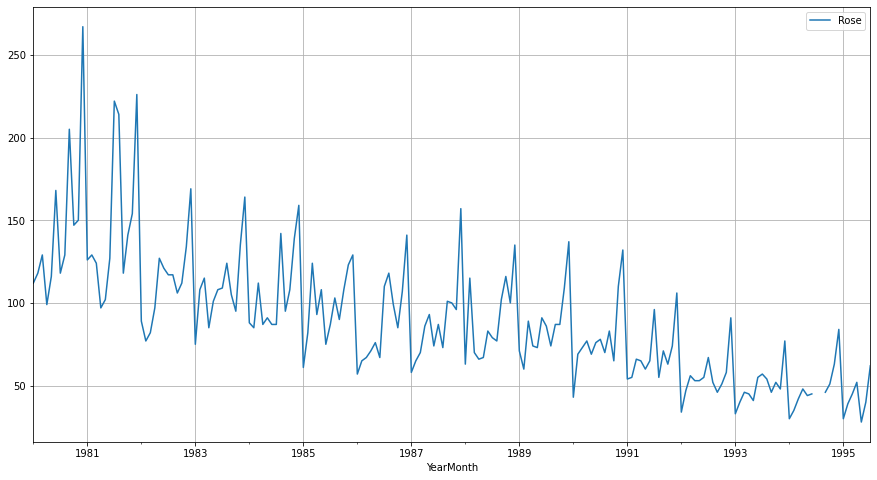

In [12]:
df.plot(grid=True)

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.394595,39.175344,28.0,63.0,86.0,112.0,267.0


In [15]:
df.isna().sum()

Rose    2
dtype: int64

In [16]:
df["1994"]

,Rose
YearMonth,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [17]:
df["1994"]=df.interpolate(method="spline", order=1)["1994"]
df["1994"]

,Rose
YearMonth,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,46.155493
1994-08-31,47.221907
1994-09-30,46.000000


In [18]:
df.isna().sum()

Rose    0
dtype: int64

In [19]:
df.describe()

,Rose
count,187.000000
mean,89.927152
std,39.224081
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


<AxesSubplot:xlabel='YearMonth'>

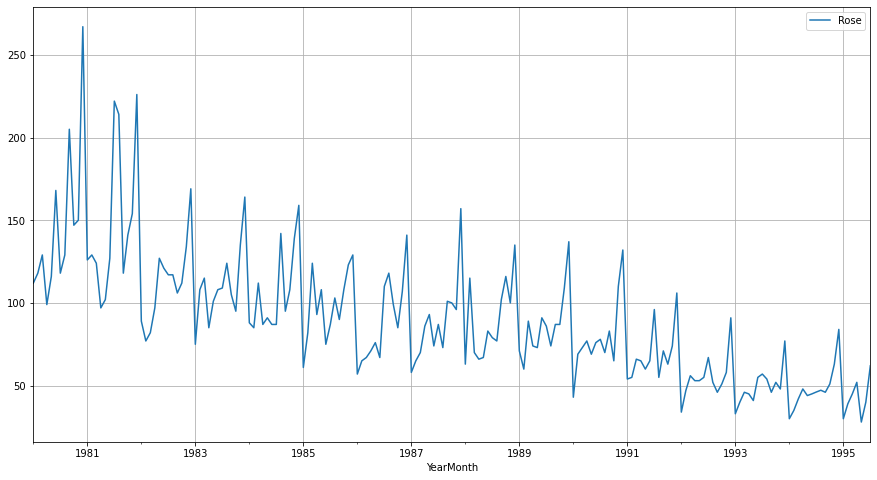

In [20]:
df.plot(grid=True)

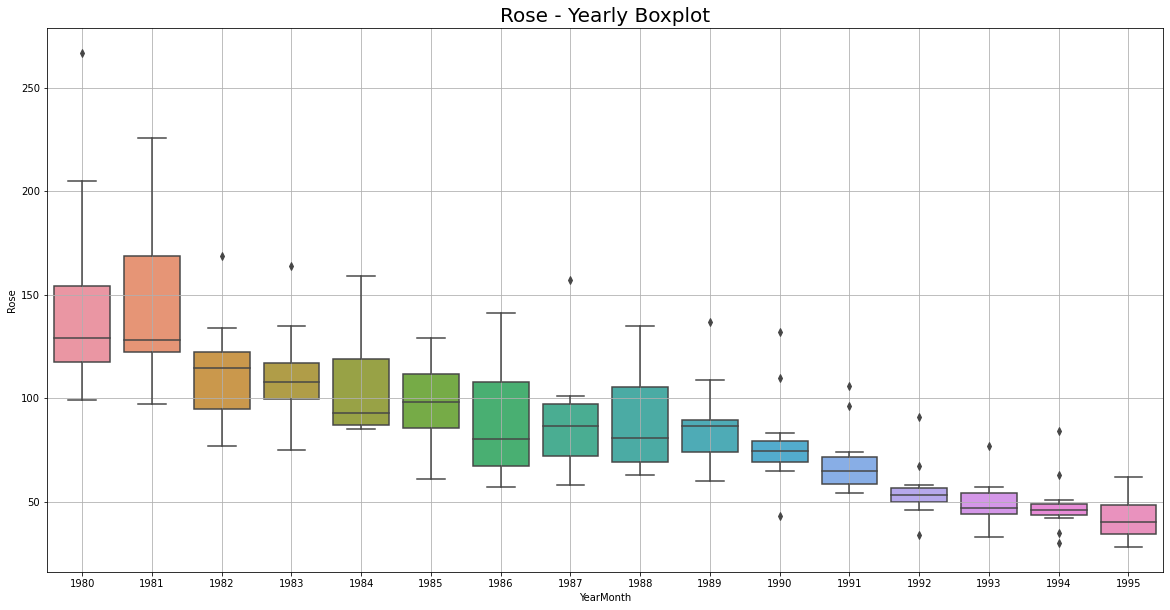

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.index.year, y=df["Rose"])
plt.title("Rose - Yearly Boxplot", fontsize=20)
plt.grid()
plt.show()

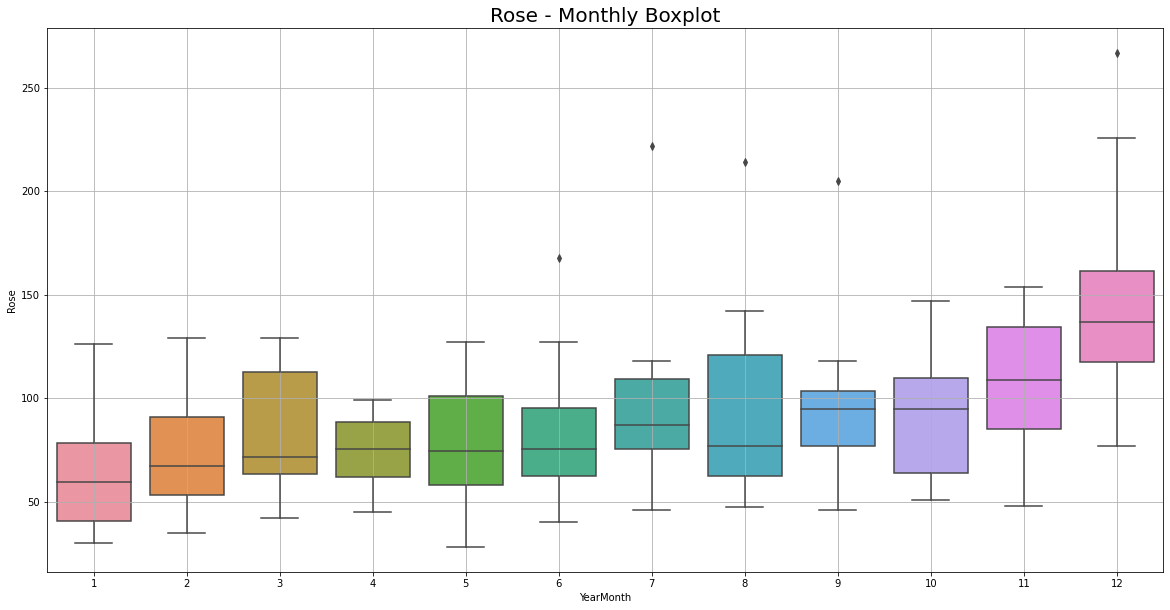

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.index.month, y=df["Rose"])
plt.title("Rose - Monthly Boxplot", fontsize=20)
plt.grid()
plt.show()

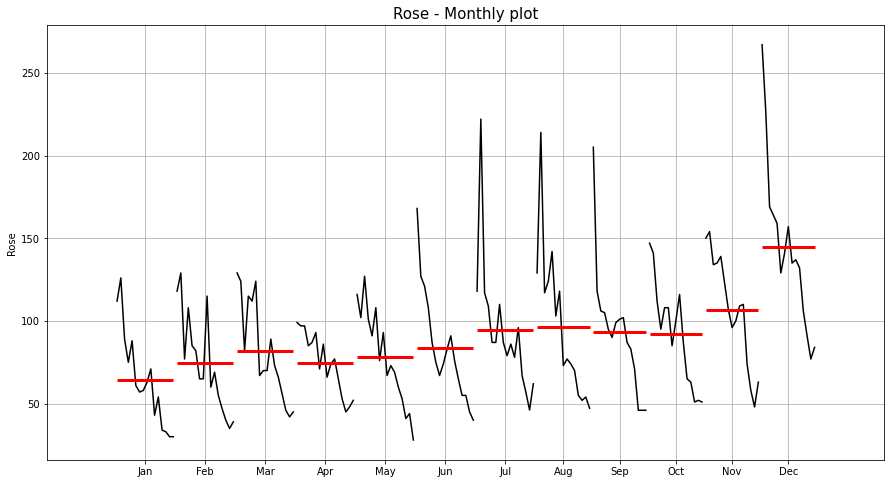

In [23]:
month_plot(df, ylabel = "Rose")
plt.title("Rose - Monthly plot", fontsize = 15)
plt.grid();

In [24]:
yearly_sales_across_months = pd.pivot_table(df, values = "Rose", columns = df.index.month, index = df.index.year)
yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


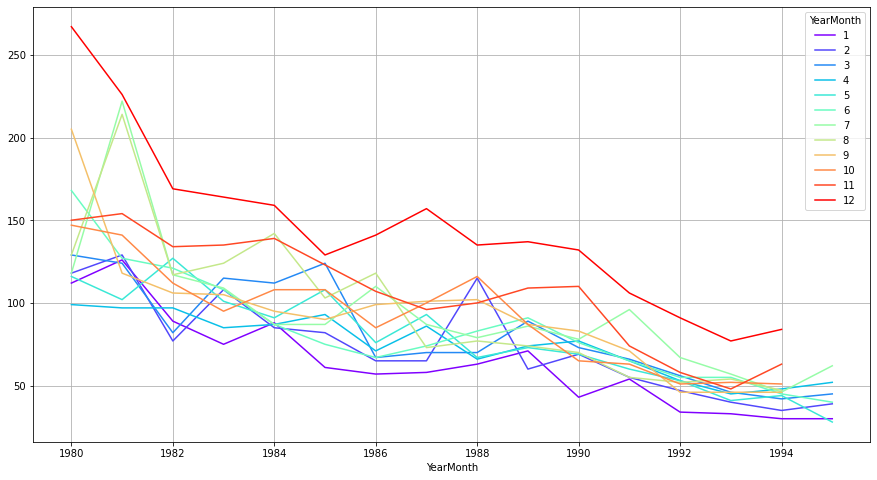

In [25]:
yearly_sales_across_months.plot(colormap="rainbow")
plt.grid()

In [26]:
df_yearly_sum=df.resample("A").sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


Text(0.5, 0, 'Sum of the observation of each year')

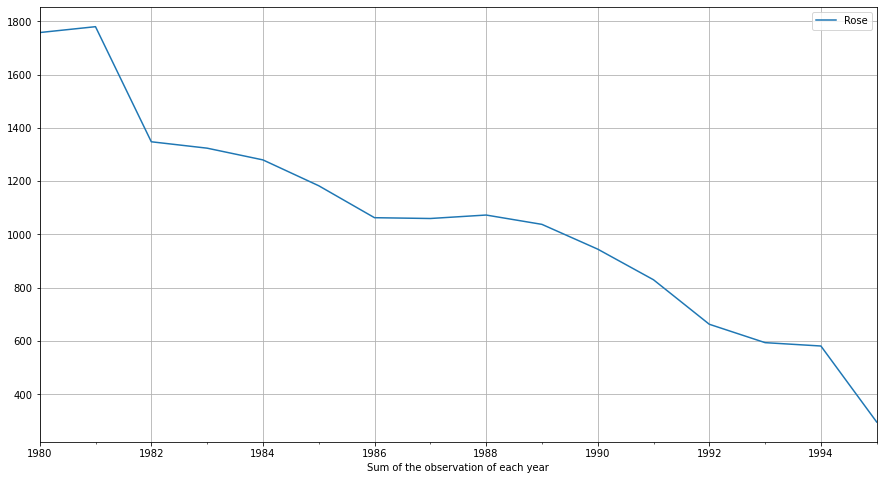

In [27]:
df_yearly_sum.plot()
plt.grid()
plt.xlabel("Sum of the observation of each year")

In [28]:
df_yearly_mean = df.resample("Y").mean()
df_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


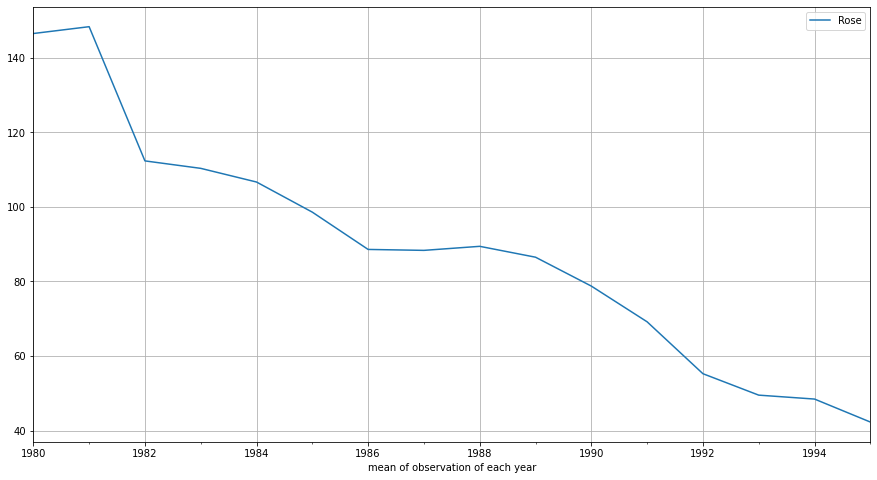

In [29]:
df_yearly_mean.plot()
plt.xlabel("mean of observation of each year")
plt.grid()

In [30]:
df_quarterly_sum=df.resample("Q").sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


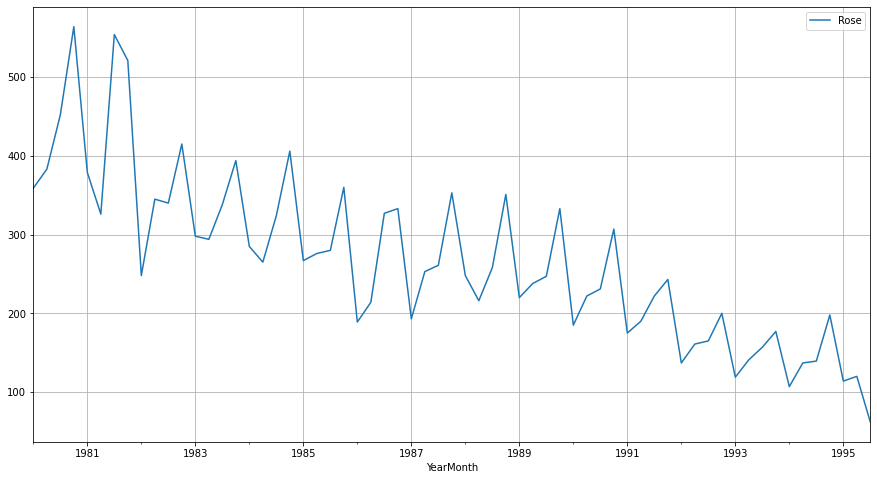

In [31]:
df_quarterly_sum.plot()
plt.grid()

In [32]:
df_quarterly_mean=df.resample("Q").sum()
df_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


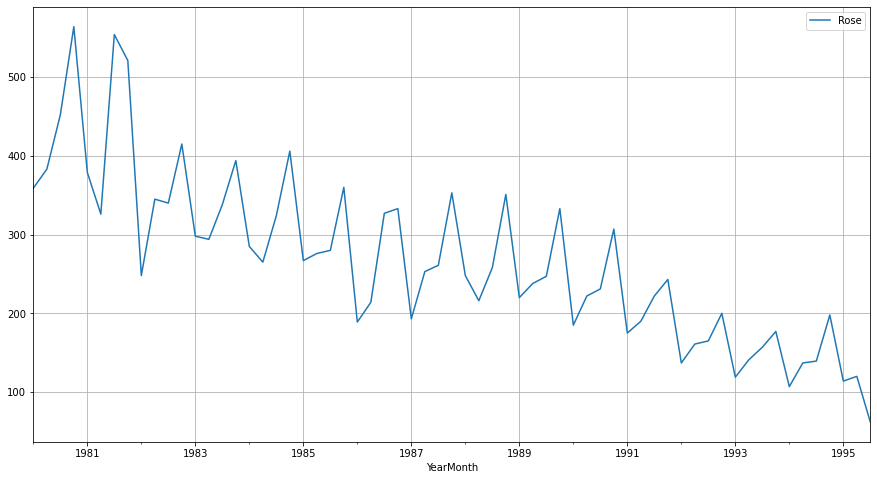

In [33]:
df_quarterly_mean.plot()
plt.grid()

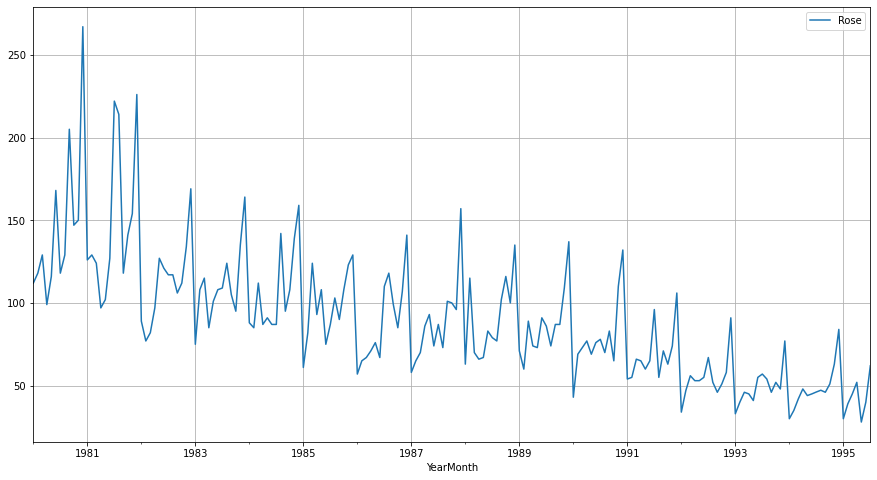

In [34]:
df.plot()
plt.grid()

In [35]:
df_decade_sum = df.resample("10Y").sum()
df_decade_sum

,Rose
YearMonth,
1980-12-31,1758.0000
1990-12-31,12094.0000
2000-12-31,2964.3774


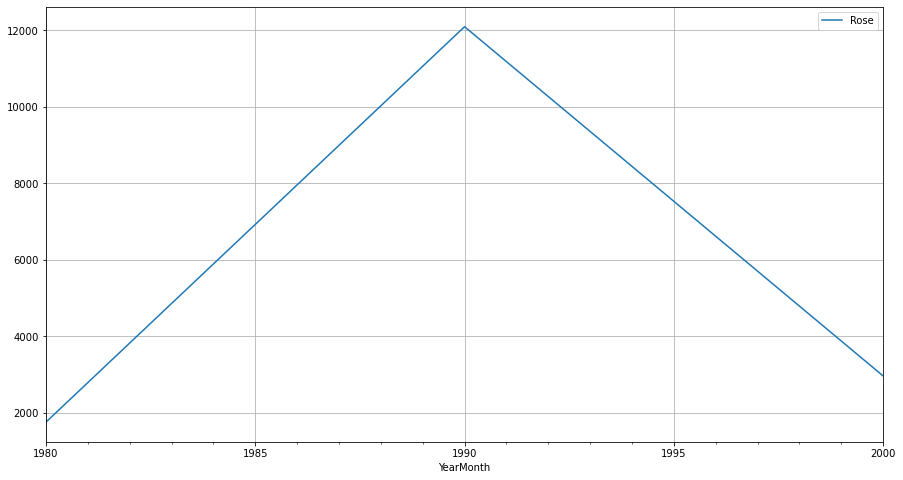

In [36]:
df_decade_sum.plot()
plt.grid()

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
df_add_decompose = seasonal_decompose(df, model = "additive", period = 12)

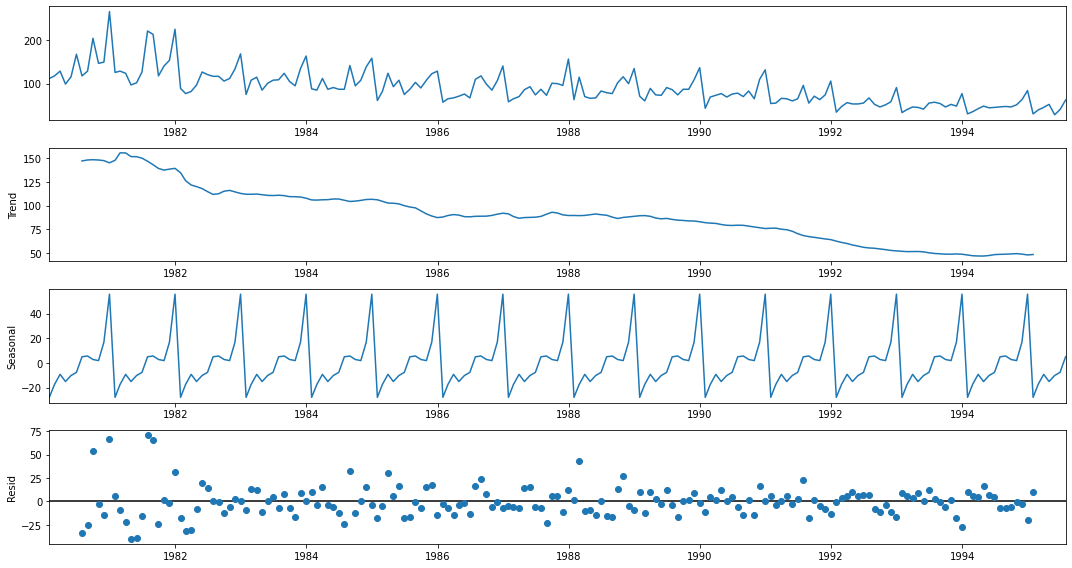

In [39]:
df_add_decompose.plot()
plt.show()

In [40]:
trend=df_add_decompose.trend
seasonality=df_add_decompose.seasonal
residual=df_add_decompose.resid

In [41]:
print("Trend","/n",trend.head(),"/n")
print("Seasonality","/n",seasonality.head(),"/n")
print("Residual","/n",residual.head(),"/n")

Trend /n YearMonth
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: trend, dtype: float64 /n
Seasonality /n YearMonth
1980-01-31   -27.921848
1980-02-29   -17.445147
1980-03-31    -9.299974
1980-04-30   -15.112474
1980-05-31   -10.210688
Name: seasonal, dtype: float64 /n
Residual /n YearMonth
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: resid, dtype: float64 /n


In [42]:
deseasonality_ts=trend+residual
deseasonality_ts.head(10)

YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.061482
1980-08-31    123.409832
1980-09-30    202.238515
1980-10-31    145.141292
dtype: float64

In [43]:
deseasonality_ts.tail(10)

YearMonth
1994-10-31    49.141292
1994-11-30    46.166292
1994-12-31    28.299626
1995-01-31    57.921848
1995-02-28          NaN
1995-03-31          NaN
1995-04-30          NaN
1995-05-31          NaN
1995-06-30          NaN
1995-07-31          NaN
dtype: float64

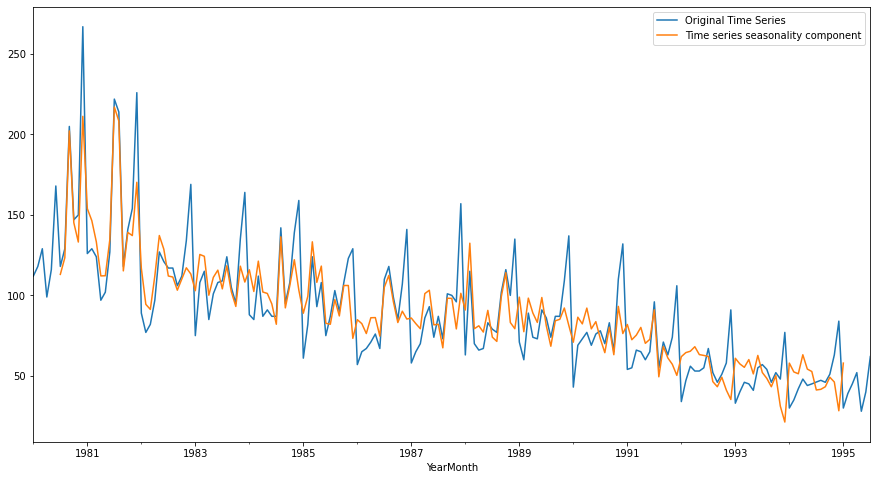

In [44]:
df.plot()
deseasonality_ts.plot()
plt.legend(["Original Time Series","Time series seasonality component"])

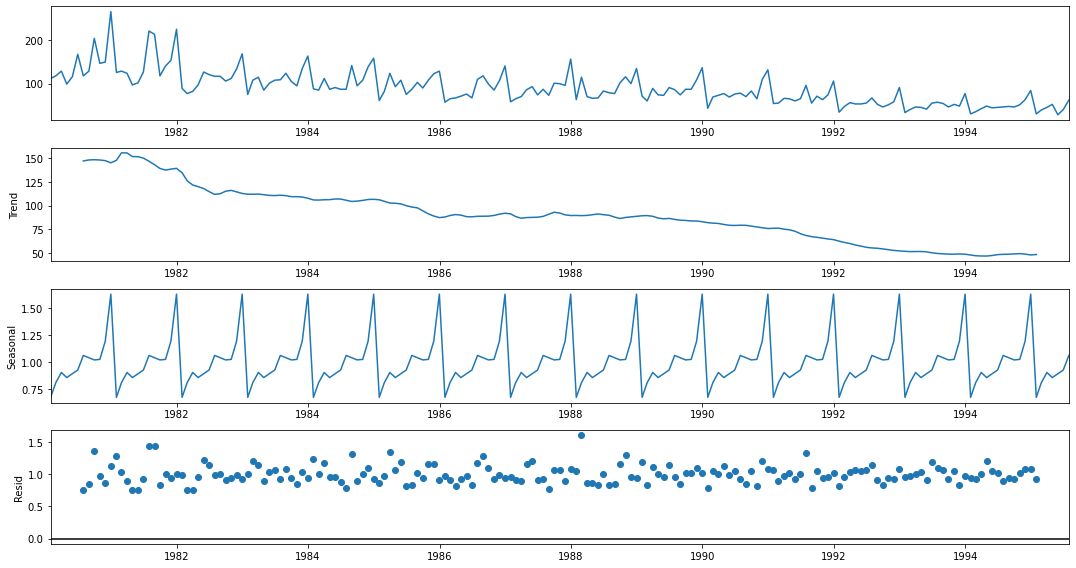

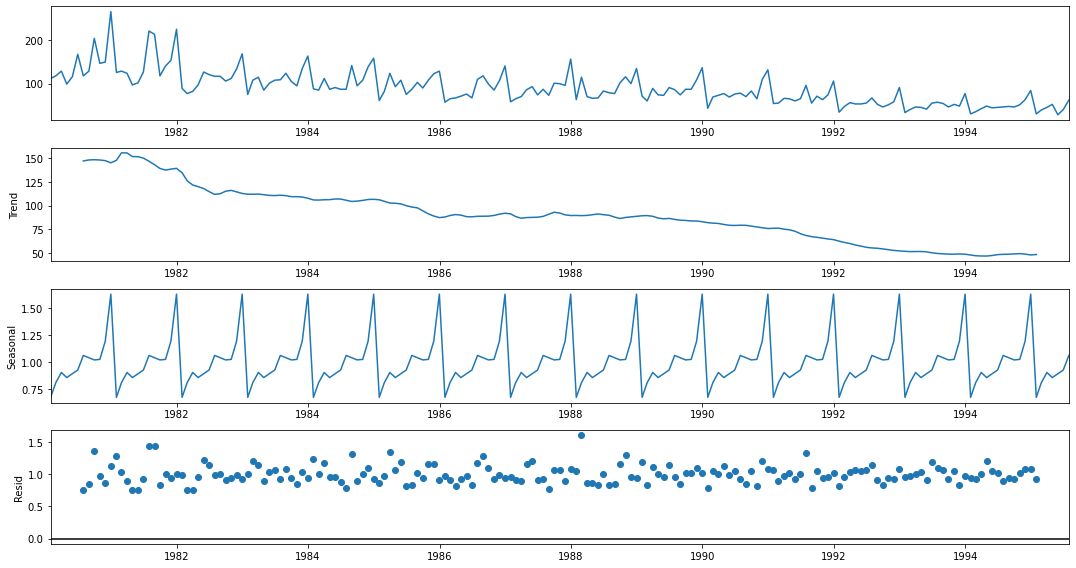

In [45]:
df_mul_decompose=seasonal_decompose(df,model="multiplicative")
df_mul_decompose.plot()

In [46]:
trend=df_mul_decompose.trend
seasonality=df_mul_decompose.seasonal
residual=df_mul_decompose.resid

In [47]:
print("Trend","/n",trend.head(),"/n")
print("Seasonality","/n",seasonality.head(),"/n")
print("Residual","/n",residual.head(),"/n")

Trend /n YearMonth
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: trend, dtype: float64 /n
Seasonality /n YearMonth
1980-01-31    0.669945
1980-02-29    0.806018
1980-03-31    0.900897
1980-04-30    0.853717
1980-05-31    0.889141
Name: seasonal, dtype: float64 /n
Residual /n YearMonth
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
Name: resid, dtype: float64 /n


In [48]:
deseasonality_ts_mul=trend+residual
deseasonality_ts_mul.head(10)

YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.840959
1980-08-31    148.964193
1980-09-30    149.733004
1980-10-31    149.054363
dtype: float64

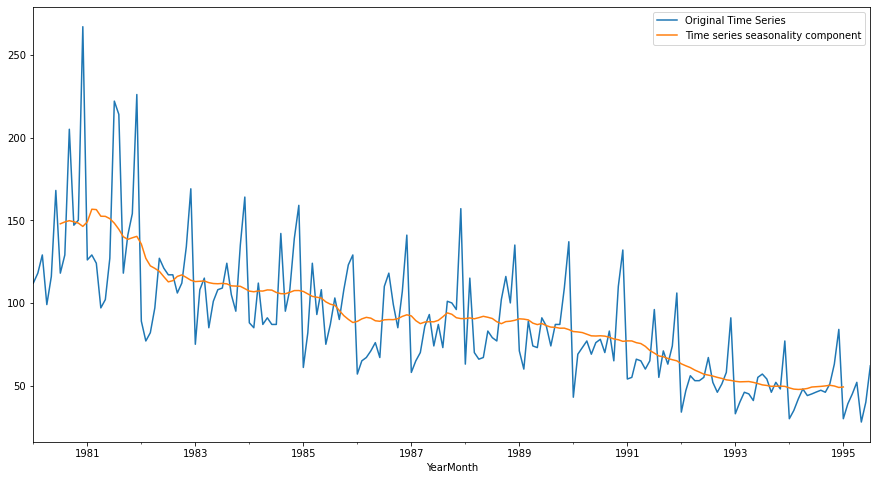

In [49]:
df.plot()
deseasonality_ts_mul.plot()
plt.legend(["Original Time Series","Time series seasonality component"])

### Split the data into training and test. The test data should start in 1991.

In [50]:
train=df[df.index<"1991"]
test=df[df.index>="1991"]

In [51]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


<AxesSubplot:xlabel='YearMonth'>

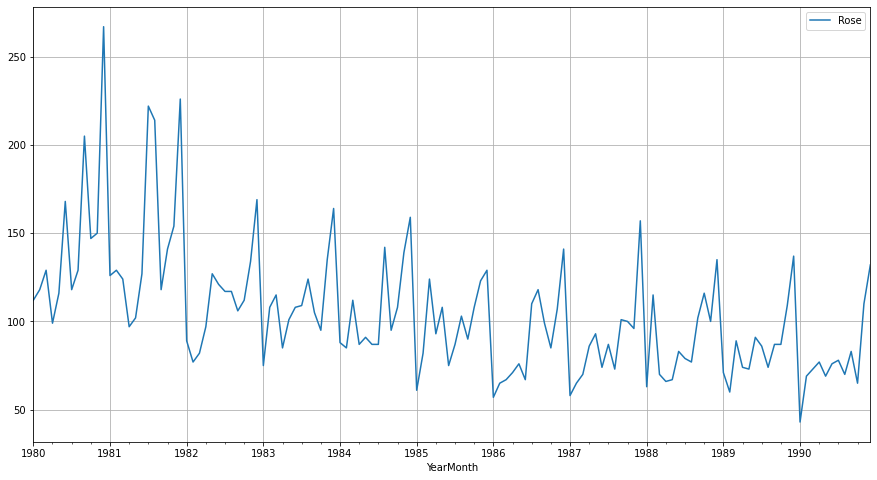

In [52]:
train.plot(grid=True)

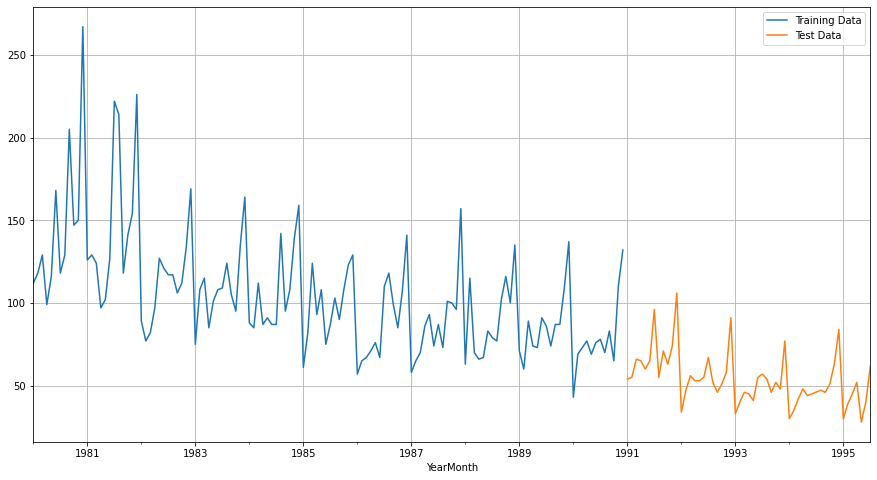

In [53]:
train["Rose"].plot()
test["Rose"].plot()
plt.grid()
plt.legend(["Training Data","Test Data"])
plt.show()

### Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

##### Model1: Linear regression

In [54]:
# For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence.
# For this we need to modify our training data before fitting it into a linear regression.

train_time=[i+1 for i in range(len(train))]
test_time=[i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [55]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [56]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
YearMonth,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
YearMonth,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
YearMonth,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data


,Rose,time
YearMonth,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


In [57]:
#Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯to build the model on the training data and test the model on the test data.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

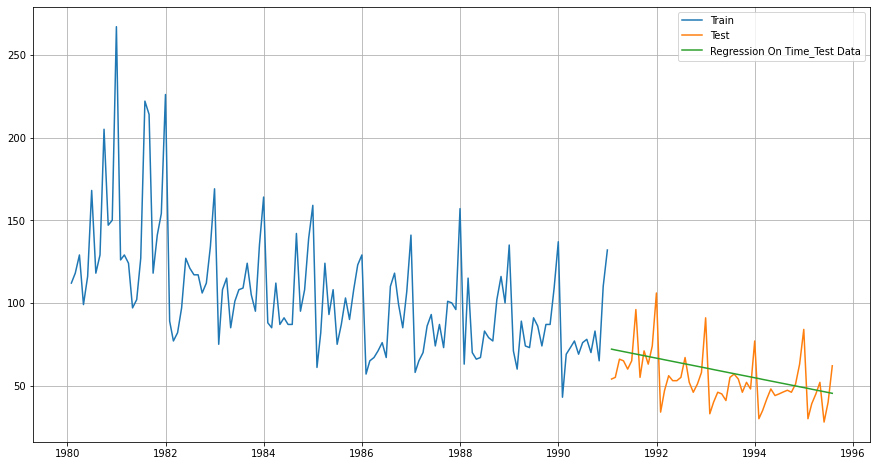

In [61]:
train_predictions_model1  = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [54]:
from sklearn import metrics

In [62]:
#model evalution
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255 


In [63]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.255435


##### Model 2: Naive Approach:  𝑦̂ 𝑡+1=

In [64]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [65]:
train.tail()

,Rose
YearMonth,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [69]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

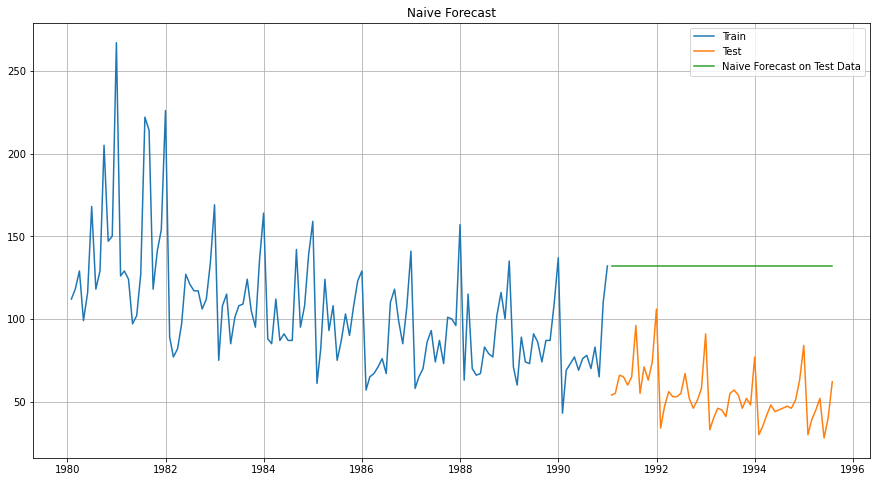

In [70]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [71]:
# Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


In [72]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238


##### Model3: Simple Average

In [73]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [74]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


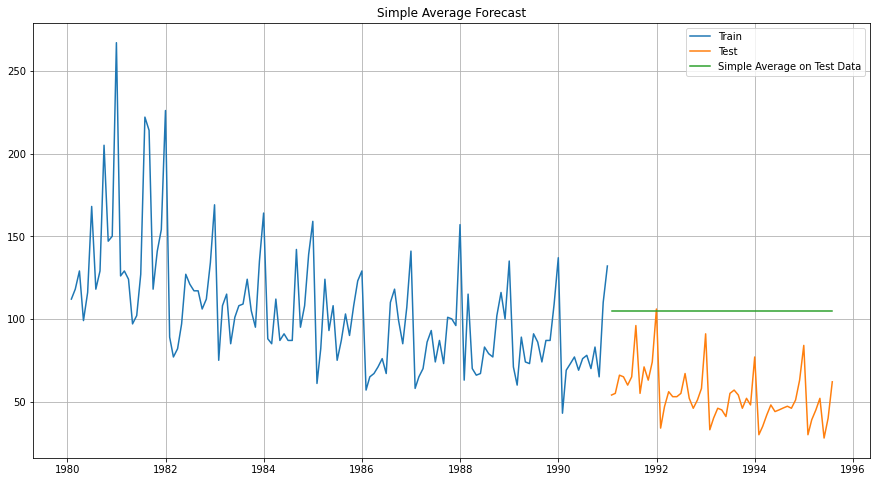

In [75]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [76]:
# Model evaluation 
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [77]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057


##### Model4: Moving average

In [78]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [79]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


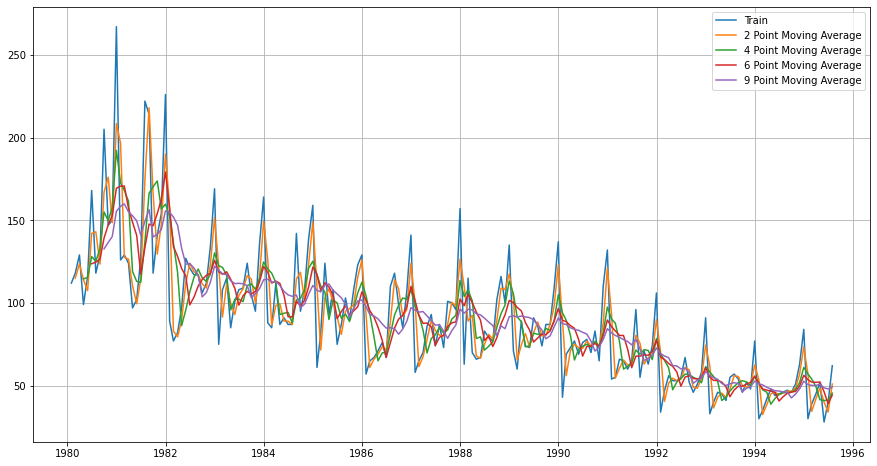

In [80]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [81]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

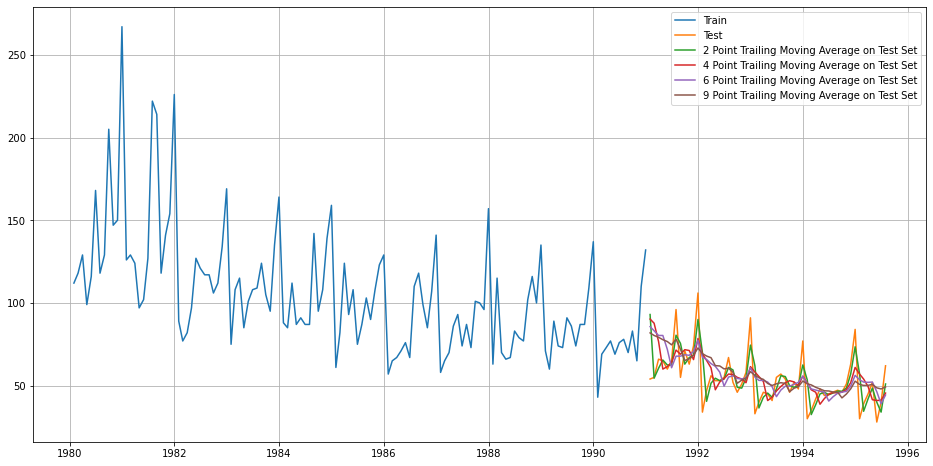

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [73]:
# model evaluation

In [83]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.721


In [84]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.255435
NaiveModel,79.672238
SimpleAverageModel,53.413057
2pointTrailingMovingAverage,11.529994
4pointTrailingMovingAverage,14.444342
6pointTrailingMovingAverage,14.554944
9pointTrailingMovingAverage,14.721499


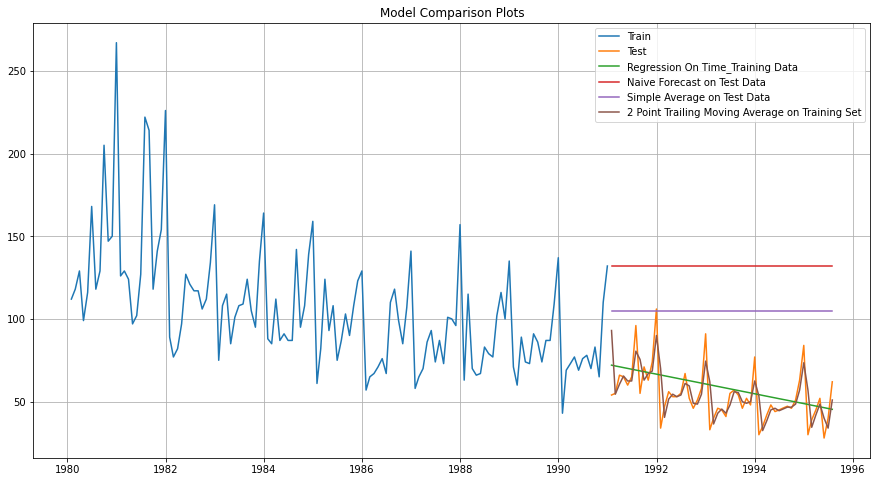

In [85]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [86]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [87]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [88]:
model_SES_autofit = model_SES.fit(optimized=True)

In [89]:
model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104992
1991-02-28    87.104992
1991-03-31    87.104992
1991-04-30    87.104992
1991-05-31    87.104992
1991-06-30    87.104992
1991-07-31    87.104992
1991-08-31    87.104992
1991-09-30    87.104992
1991-10-31    87.104992
1991-11-30    87.104992
1991-12-31    87.104992
1992-01-31    87.104992
1992-02-29    87.104992
1992-03-31    87.104992
1992-04-30    87.104992
1992-05-31    87.104992
1992-06-30    87.104992
1992-07-31    87.104992
1992-08-31    87.104992
1992-09-30    87.104992
1992-10-31    87.104992
1992-11-30    87.104992
1992-12-31    87.104992
1993-01-31    87.104992
1993-02-28    87.104992
1993-03-31    87.104992
1993-04-30    87.104992
1993-05-31    87.104992
1993-06-30    87.104992
1993-07-31    87.104992
1993-08-31    87.104992
1993-09-30    87.104992
1993-10-31    87.104992
1993-11-30    87.104992
1993-12-31    87.104992
1994-01-31    87.104992
1994-02-28    87.104992
1994-03-31    87.104992
1994-04-30    87.104992
1994-05-31    87.104992
1994-06-30    87

Text(0.5, 1.0, 'Alpha - 0.07 Prediction')

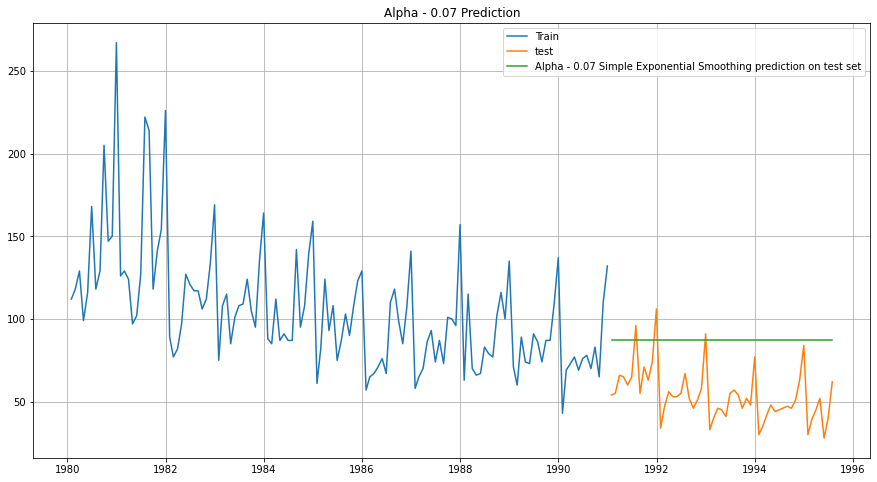

In [91]:
plt.plot(train, label="Train")
plt.plot(test, label="test")
plt.plot(SES_predict, label="Alpha - 0.07 Simple Exponential Smoothing prediction on test set")

plt.legend(loc='best')
plt.grid()
plt.title("Alpha - 0.07 Prediction")

In [92]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [93]:
from sklearn.metrics import mean_squared_error
import statsmodels.tools.eval_measures as em

In [94]:
print("SES RMSE: ", mean_squared_error(test.values, SES_predict.values, squared=False))
print("SES RMSE (calculated using statsmodel): ",em.rmse(test.values,SES_predict.values[0]))

SES RMSE:  36.748154733118554
SES RMSE (calculated using statsmodel):  [36.74815473]


In [95]:
result_1=pd.DataFrame({"RMSE": [em.rmse(test.values, SES_predict.values)[0]]}, index=["Alpha=0.07,SESres"])

In [96]:
result_1

,RMSE
"Alpha=0.07,SESres",36.748155


In [97]:
model_des=Holt(train, initialization_method="estimated")
model_des=model_des.fit()

print(" ")
print("Holt model exponential smoothing estimated parameters")
print(" ")
print(model_des.params)

 
Holt model exponential smoothing estimated parameters
 
{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [98]:
des_predict=model_des.forecast(len(test))
des_predict

1991-01-31    72.063269
1991-02-28    71.568892
1991-03-31    71.074514
1991-04-30    70.580136
1991-05-31    70.085758
1991-06-30    69.591381
1991-07-31    69.097003
1991-08-31    68.602625
1991-09-30    68.108247
1991-10-31    67.613870
1991-11-30    67.119492
1991-12-31    66.625114
1992-01-31    66.130736
1992-02-29    65.636358
1992-03-31    65.141981
1992-04-30    64.647603
1992-05-31    64.153225
1992-06-30    63.658847
1992-07-31    63.164470
1992-08-31    62.670092
1992-09-30    62.175714
1992-10-31    61.681336
1992-11-30    61.186959
1992-12-31    60.692581
1993-01-31    60.198203
1993-02-28    59.703825
1993-03-31    59.209447
1993-04-30    58.715070
1993-05-31    58.220692
1993-06-30    57.726314
1993-07-31    57.231936
1993-08-31    56.737559
1993-09-30    56.243181
1993-10-31    55.748803
1993-11-30    55.254425
1993-12-31    54.760047
1994-01-31    54.265670
1994-02-28    53.771292
1994-03-31    53.276914
1994-04-30    52.782536
1994-05-31    52.288159
1994-06-30    51

Text(0.5, 1.0, 'Simple and Double Exopential Prediction')

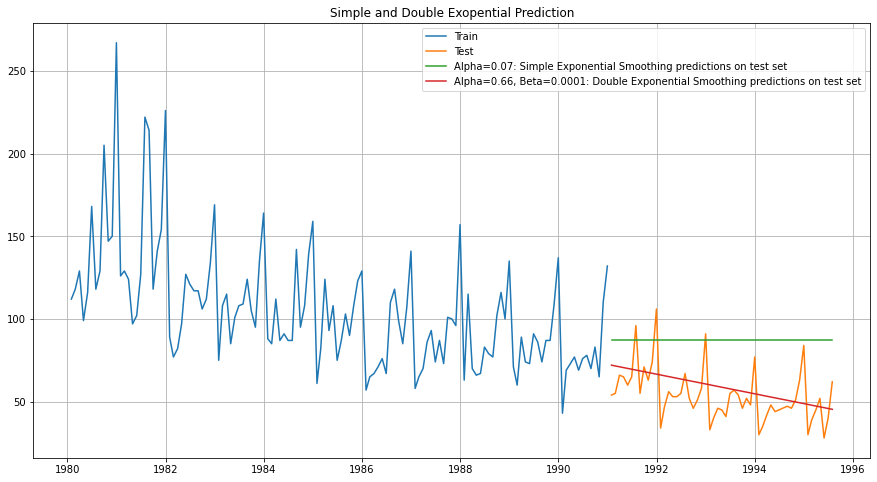

In [99]:
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(SES_predict, label="Alpha=0.07: Simple Exponential Smoothing predictions on test set")
plt.plot(des_predict, label="Alpha=0.66, Beta=0.0001: Double Exponential Smoothing predictions on test set")
plt.legend(loc="best")
plt.grid()
plt.title("Simple and Double Exopential Prediction")

In [100]:
print("DES RMSE: ", mean_squared_error(test.values, des_predict.values, squared=False))

DES RMSE:  15.255436717071268


In [101]:
result_temp=pd.DataFrame({"RMSE": [mean_squared_error(test.values, des_predict.values, squared=False)]}, index=["Alpha=0.66, Beta=0.0001:DES"])
result_temp=pd.concat([result_temp, result_temp])
result_1

,RMSE
"Alpha=0.07,SESres",36.748155


In [102]:
model_tes=ExponentialSmoothing(train, trend="additive", seasonal="additive", initialization_method="estimated")
model_tes=model_tes.fit()
print(" ")
print(" ==Holt Winters model Exponential Smoothing Estimated Parameters ==")
print(" ")
print(model_tes.params)

 
 ==Holt Winters model Exponential Smoothing Estimated Parameters ==
 
{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [103]:
tes_predict=model_tes.forecast(len(test))
tes_predict

1991-01-31     42.716117
1991-02-28     54.528923
1991-03-31     61.968476
1991-04-30     50.782306
1991-05-31     59.046436
1991-06-30     63.984756
1991-07-31     73.284643
1991-08-31     78.885632
1991-09-30     74.336035
1991-10-31     71.904228
1991-11-30     89.445446
1991-12-31    131.087464
1992-01-31     36.158278
1992-02-29     47.971084
1992-03-31     55.410637
1992-04-30     44.224467
1992-05-31     52.488597
1992-06-30     57.426917
1992-07-31     66.726804
1992-08-31     72.327793
1992-09-30     67.778196
1992-10-31     65.346389
1992-11-30     82.887606
1992-12-31    124.529625
1993-01-31     29.600439
1993-02-28     41.413245
1993-03-31     48.852798
1993-04-30     37.666628
1993-05-31     45.930758
1993-06-30     50.869078
1993-07-31     60.168965
1993-08-31     65.769954
1993-09-30     61.220357
1993-10-31     58.788550
1993-11-30     76.329767
1993-12-31    117.971785
1994-01-31     23.042600
1994-02-28     34.855406
1994-03-31     42.294959
1994-04-30     31.108789


Text(0.5, 1.0, 'Simple, Double and Triple EXponential Smoothing prediction.')

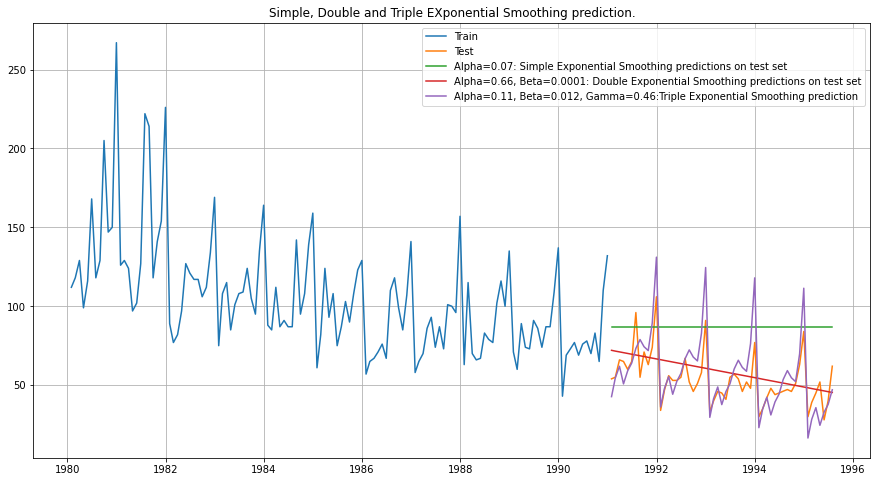

In [104]:
plt.plot(train,label="Train")
plt.plot(test, label="Test")

plt.plot(SES_predict, label="Alpha=0.07: Simple Exponential Smoothing predictions on test set")
plt.plot(des_predict, label="Alpha=0.66, Beta=0.0001: Double Exponential Smoothing predictions on test set")
plt.plot(tes_predict, label="Alpha=0.11, Beta=0.012, Gamma=0.46:Triple Exponential Smoothing prediction")
plt.legend(loc="best")
plt.grid()
plt.title("Simple, Double and Triple EXponential Smoothing prediction.")

In [105]:
print("TES RMSE:", mean_squared_error(test.values,tes_predict.values,squared=False))
     

TES RMSE: 14.24487966159066


In [106]:
result_temp=pd.DataFrame({"RMSE":[mean_squared_error(test.values,tes_predict, squared=False)]},  index=["Alpha=0.11, Beta=0.49, Gamma=0.36:TES"])
result_1=pd.concat([result_1,result_temp])

In [107]:
resultsDf=pd.concat([resultsDf,result_1])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,15.255435,NaN
NaiveModel,79.672238,NaN
SimpleAverageModel,53.413057,NaN
2pointTrailingMovingAverage,11.529994,NaN
4pointTrailingMovingAverage,14.444342,NaN
6pointTrailingMovingAverage,14.554944,NaN
9pointTrailingMovingAverage,14.721499,NaN
"Alpha=0.07,SESres",NaN,36.748155
"Alpha=0.11, Beta=0.49, Gamma=0.36:TES",NaN,14.244880


In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
dftest=adfuller(df,regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -2.240 
DF test p-value is  0.46755392431131565
Number of lags used  13


<AxesSubplot:xlabel='YearMonth'>

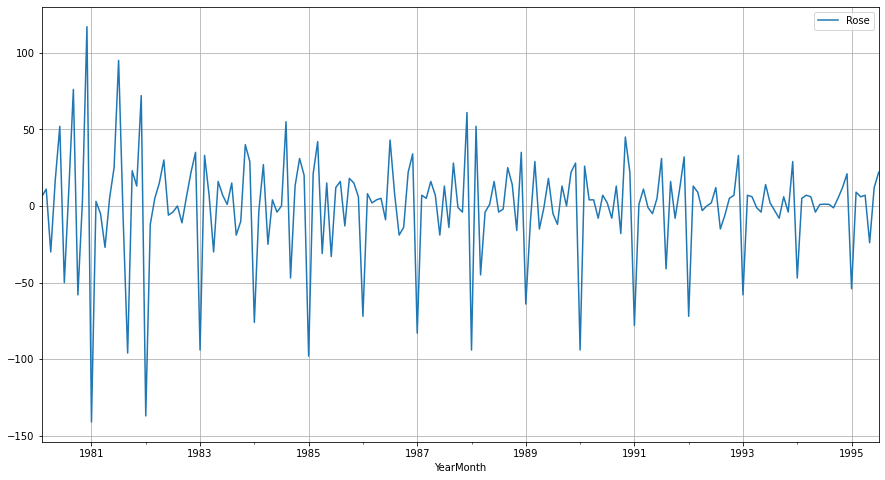

In [110]:
df.diff().dropna().plot(grid=True)

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

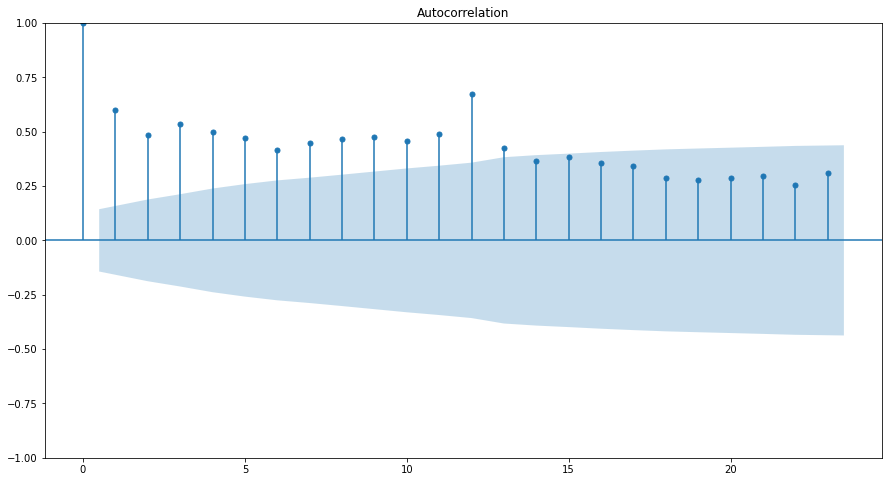

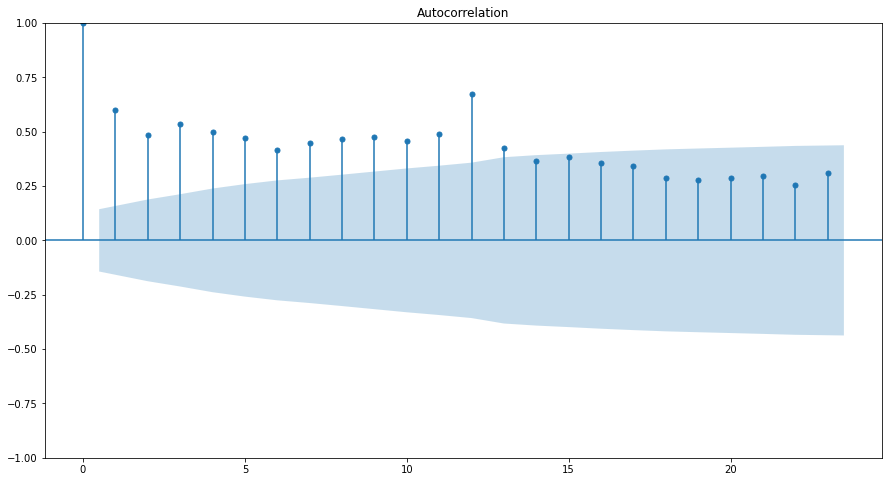

In [112]:
plot_acf(df, alpha=0.05)

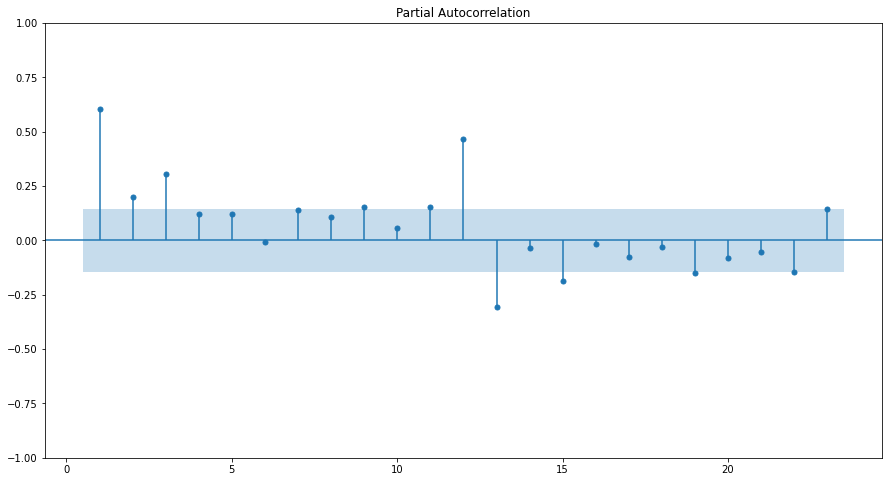

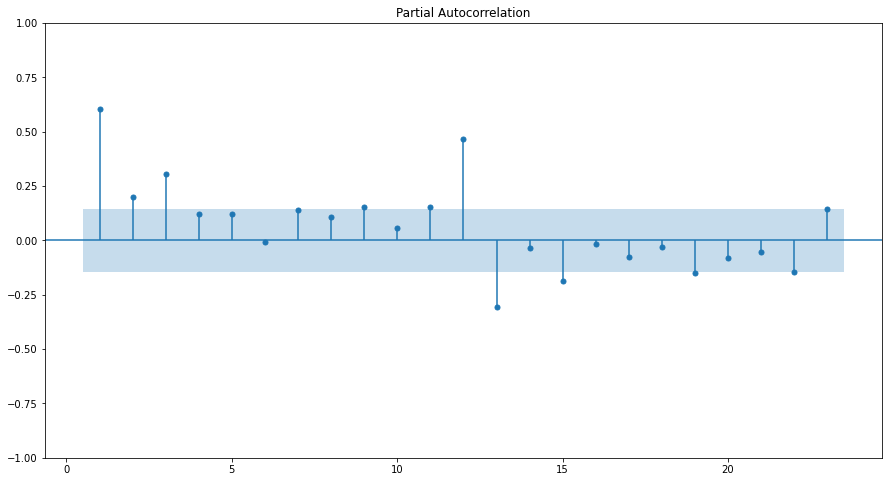

In [113]:
plot_pacf(df, zero=False, alpha=0.05)

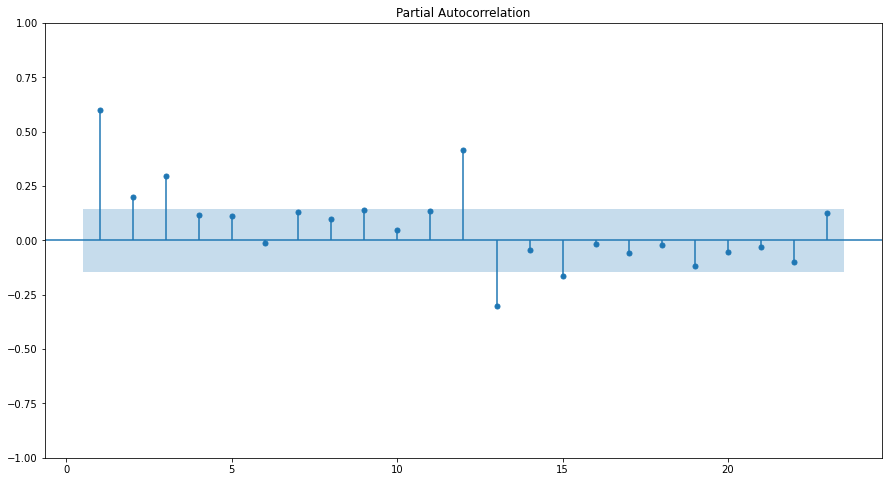

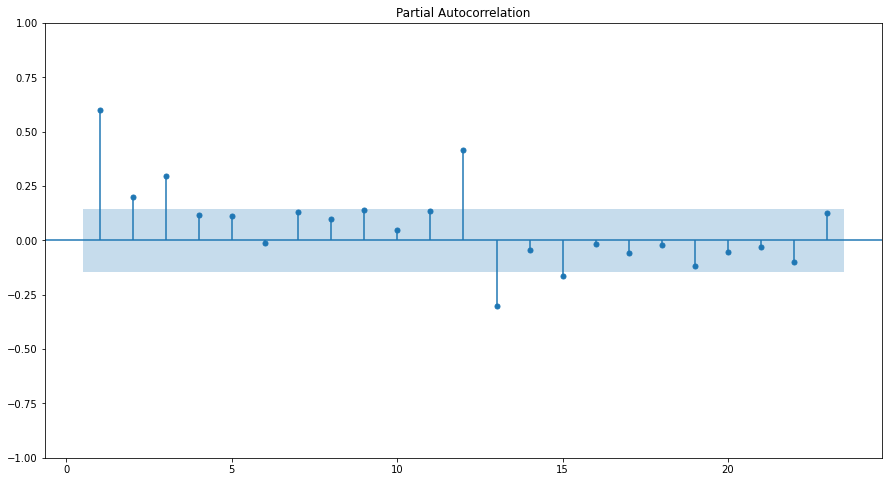

In [114]:
plot_pacf(df, zero=False, alpha=0.05, method="ywmle")

<AxesSubplot:xlabel='YearMonth'>

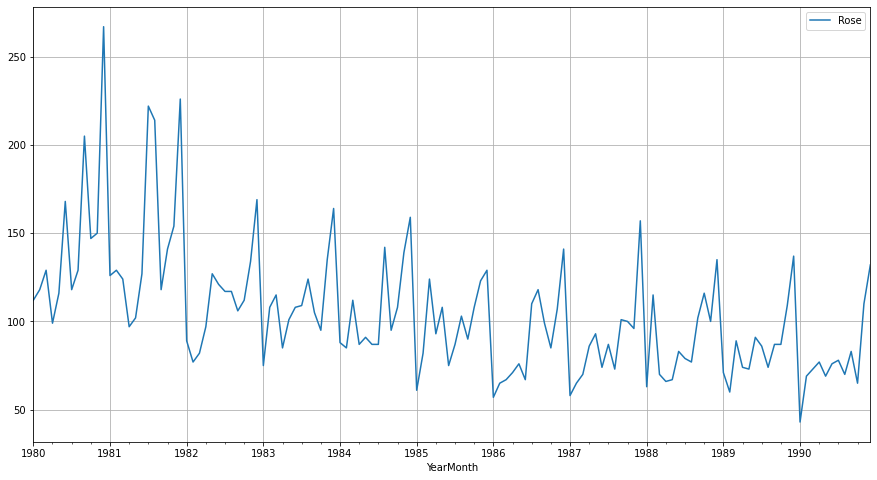

In [115]:
train.plot(grid=True)

In [116]:
dftest=adfuller(train,regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -1.686 
DF test p-value is  0.7569093051047106
Number of lags used  13


In [117]:
dftest=adfuller(train.diff().dropna(),regression="ct")
print("DF test statistics is %3.3f "%dftest[0])
print("DF test p-value is ", dftest[1])
print("Number of lags used ", dftest[2])

DF test statistics is -6.804 
DF test p-value is  3.894831356781761e-08
Number of lags used  12


<AxesSubplot:xlabel='YearMonth'>

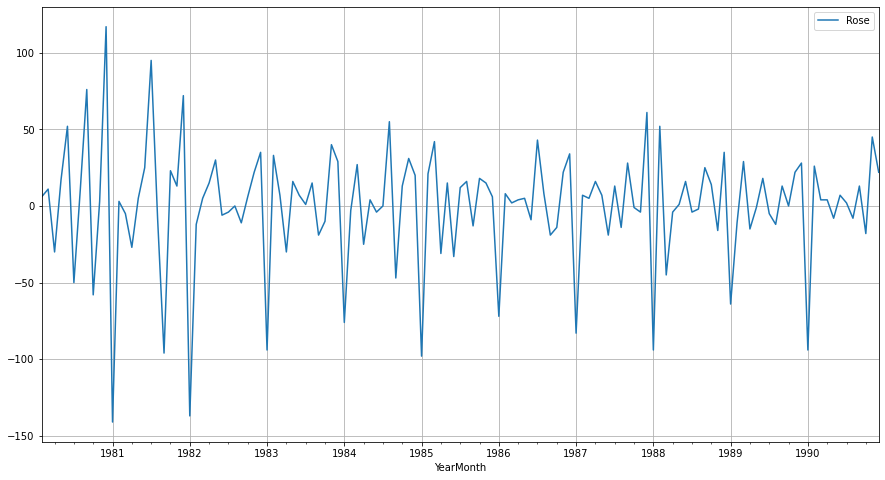

In [118]:
train.diff().dropna().plot(grid=True)

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [120]:
import itertools
p = q = range(0,4)
d = range(1,2)
pdq=list(itertools.product(p,d,q))
print("Examples of the parameter combination for the model")
for i in range(0, len(pdq)):
    print("Model: {}".format(pdq[i]))

Examples of the parameter combination for the model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [122]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train["Rose"].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868465
ARIMA(2, 1, 2) - AIC:1281.870722226468


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.695357889742
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271939
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6619652725685


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695358
15,"(3, 1, 3)",1278.661965
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [130]:
auto_ARIMA = ARIMA(train, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Thu, 02 Nov 2023   AIC                           1274.695
Time:                        09:55:35   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.627      1.665      0.0

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


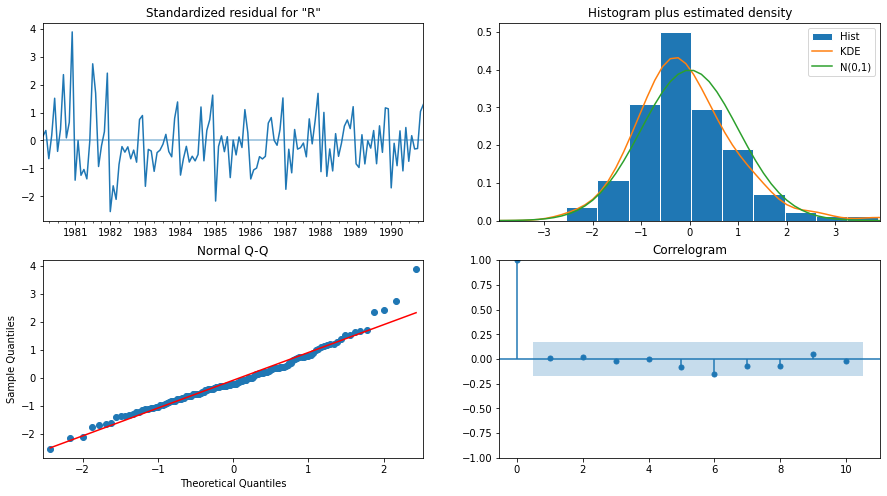

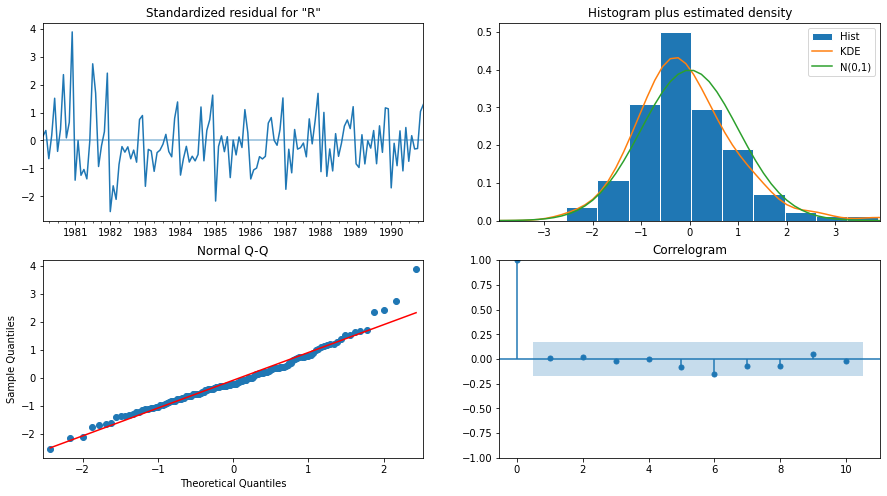

In [131]:
results_auto_ARIMA.plot_diagnostics()

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [133]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true*100)

In [134]:
rmse=mean_squared_error(test["Rose"],predicted_auto_ARIMA, squared=False)
mape=mean_absolute_percentage_error(test["Rose"],predicted_auto_ARIMA)
print("RMSE: ",rmse, "\nMAPE:", mape)

RMSE:  36.7655715491717 
MAPE: 75.66387012360607


In [135]:
result_2=pd.DataFrame({"RMSE": rmse, "MAPE":mape}
                     ,index=["ARIMA(2,1,2)"])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",36.765572,75.66387


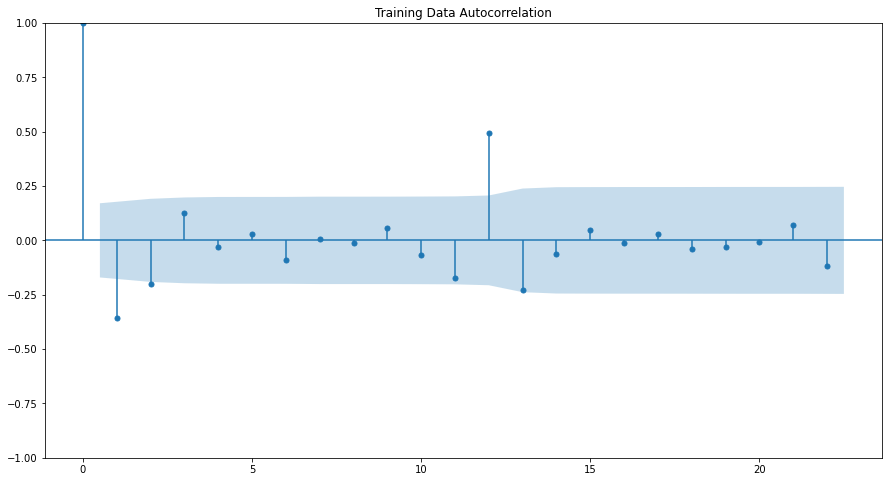

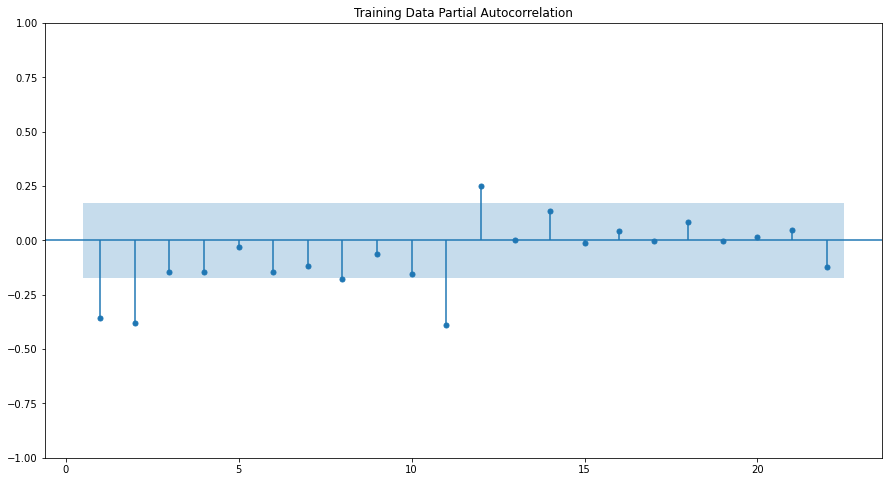

In [136]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")
plot_pacf(train.diff().dropna(),title="Training Data Partial Autocorrelation", zero=False, method="ywmle")
plt.show()

In [137]:
manual_ARIMA=ARIMA(train["Rose"], order=(3,1,3))
results_manual_ARIMA=manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.331
Date:                Thu, 02 Nov 2023   AIC                           1278.662
Time:                        09:56:02   BIC                           1298.788
Sample:                    01-31-1980   HQIC                          1286.840
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5838      0.088    -17.978      0.000      -1.756      -1.411
ar.L2         -0.6403      0.142     -4.517      0.000      -0.918      -0.362
ar.L3          0.1326      0.089      1.487      0.1

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


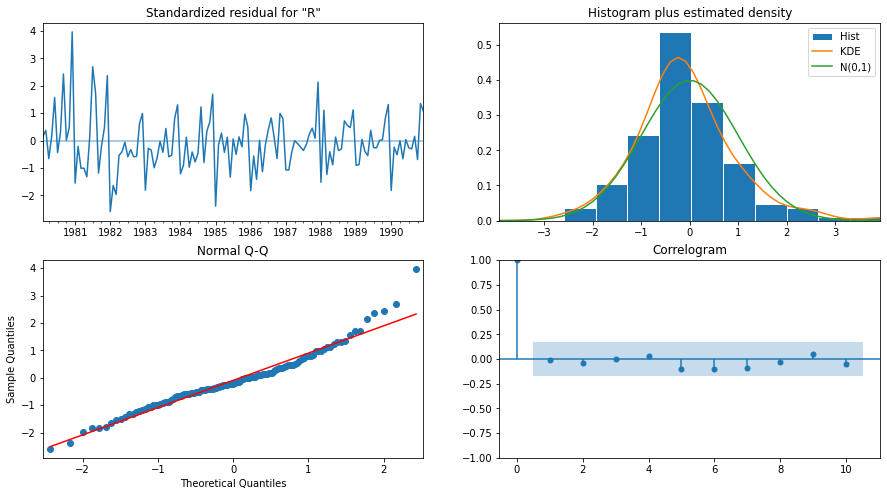

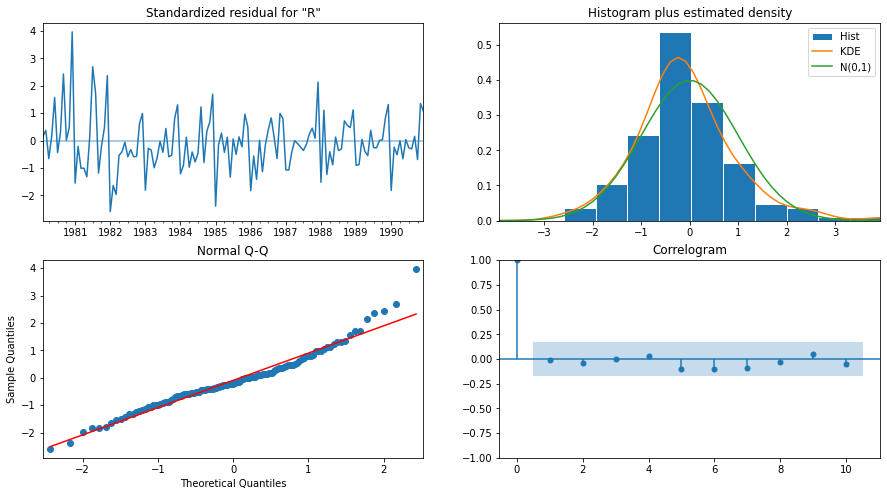

In [138]:
results_manual_ARIMA.plot_diagnostics()

In [139]:
predicted_manual_ARIMA=results_manual_ARIMA.forecast(steps=len(test))

In [140]:
rmse=mean_squared_error(test["Rose"],predicted_manual_ARIMA, squared=False)
mape=mean_absolute_percentage_error(test["Rose"], predicted_manual_ARIMA)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 36.6500072223944 
MAPE: 75.35665109194677


In [141]:
temp_result=pd.DataFrame({"RMSE":rmse,"MAPE":mape},
                        index=["ARIMA(3,1,3)"])
result_2=pd.concat([result_2, temp_result])

In [142]:
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",36.765572,75.663870
"ARIMA(3,1,3)",36.650007,75.356651


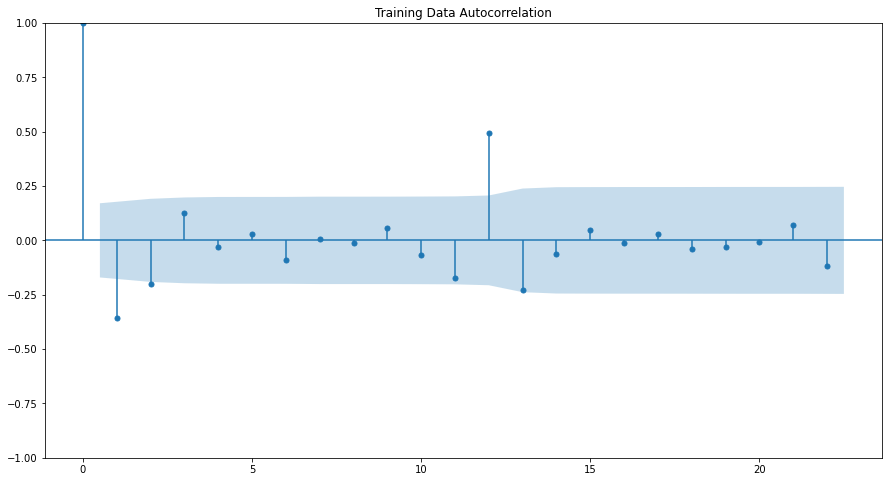

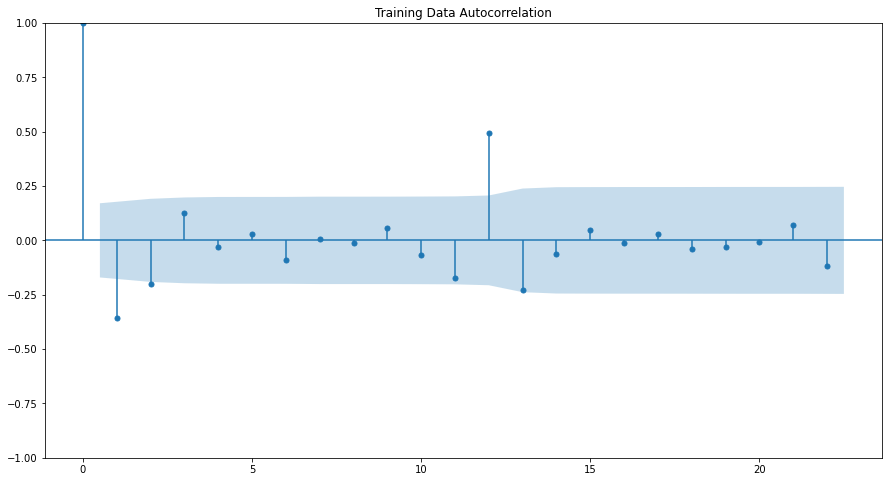

In [143]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")

In [144]:
import itertools
p=q=range(0,4)
d=range(1,2)
D=range(1,2)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,D,q))]
print("Examples of the parameter combinations for the model are")
for i in range(1, len(pdq)):
    print("model: {}{}".format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the model are
model: (0, 1, 1)(0, 1, 1, 12)
model: (0, 1, 2)(0, 1, 2, 12)
model: (0, 1, 3)(0, 1, 3, 12)
model: (1, 1, 0)(1, 1, 0, 12)
model: (1, 1, 1)(1, 1, 1, 12)
model: (1, 1, 2)(1, 1, 2, 12)
model: (1, 1, 3)(1, 1, 3, 12)
model: (2, 1, 0)(2, 1, 0, 12)
model: (2, 1, 1)(2, 1, 1, 12)
model: (2, 1, 2)(2, 1, 2, 12)
model: (2, 1, 3)(2, 1, 3, 12)
model: (3, 1, 0)(3, 1, 0, 12)
model: (3, 1, 1)(3, 1, 1, 12)
model: (3, 1, 2)(3, 1, 2, 12)
model: (3, 1, 3)(3, 1, 3, 12)


In [145]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [146]:
import statsmodels.api as sm

In [147]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(train["Rose"].values,
                                              order=param, seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
        result_SARIMA=SARIMA_model.fit(maxiter=1000)
        print("SARIMA{}x{} - AIC:{}".format(param,param_seasonal, result_SARIMA.aic))
        SARIMA_AIC=SARIMA_AIC.append({"param":param,"seasonal":param_seasonal,"AIC":result_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301616336
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776119
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2967.8368186506154
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601641
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654717
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3229.7787619084365
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729143581
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244223457
SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2458.1541923593777
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:752.39581227398
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:748.3165246489451
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:748.9721713408948
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:3053.935503990494
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562548
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717499
SARIMA(0, 1, 1)x(0, 1, 2,

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:2903.391052516554
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.245665552992
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520139
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.716167029979


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:148.45083332373508
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158643
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555760264457
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715198633
SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:2868.902426511803
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:708.083423565787
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:699.7496882906602
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:701.4835578305064
SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3269.2043118538736
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.659802427916
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:904.5003488472469
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.014095570374
SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3248.7597472748735
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923362583
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:915.2731134090645
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237144295059


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:164.83297001352173
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438178311
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.1158488729682
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:774.9691195180018
SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:2972.504190217049
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:709.6122119091959
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:701.7009924433494
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:703.0334007263228
SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:3665.4497811361925
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1088.3764710136559
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:897.1317873892842
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:778.4427567866366


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:3786.4955080741556
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:943.5043088714317
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:904.93199701147
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:780.2386079740921


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:1472.443735981756
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:813.4051893208872
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:806.4667725183435
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:767.2243746034576


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3871.640780004781
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:711.7218300812223
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:703.6693127637113
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:705.0326198129808


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3142.0887977113525
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842013
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547439
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.839883282132


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3431.0354139702163
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:962.9698535736741
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934823651
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:830.3075804966375
SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:5774.8441176203105
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808091115
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261102783006
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.0437253085969


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3518.5394819144803
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:727.3669084126745
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:728.903469043903
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:721.9926158573575


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:3504.305195083491
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464400558
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.045384498808
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856589


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:3022.246508308946
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.2974216823696
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920638200359
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.192970668466


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:504.9479130990339
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474258320679
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.9065436334095
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:783.8990994427626


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3331.0688835160277
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:702.1669809953734
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:693.9370828683382
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:695.0475172699647


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:3626.7491192821126
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.3571024978644
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:906.4966907625248
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.9832739190115


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3055.4823556681895
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870392437635
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818408408
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7843970222305


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:1688.2069742870083
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382052143828
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171139198307
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401077907957


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3277.023749262493
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:703.8075522592467
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:696.1085683613983
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:697.2354608642526


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:428.96333593888846
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1088.0914860028788
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:895.9867971299508
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:780.3059561889397
SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:2752.933504016174
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:936.6664092075087
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:906.7653660397594
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:782.1027704587194
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:18.0
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:803.661620720247
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:793.9162134396187
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:767.4753544955211


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:3162.935614193148
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:702.9343089072926
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:696.4191654849008
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:698.0866256546466


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:312.16021802719285
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1133.2467704396645
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:949.5332566880415
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:827.1933387102681
SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3329.6774976105785
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:950.2637728230414
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.2623518887087
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.719870094184


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:3727.3578952436346
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.2969261794996
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:808.5100914939165
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.0074804177777


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3210.0971686090347
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:714.7788976434351
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:705.086802148701
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:707.184691530827
SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3260.3979211736296
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1107.1166362359213
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236479118608
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.27996262775


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:2739.6948705601694
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.3197036268074
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020908641
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001391998


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:16.0
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753934404
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928051449943
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335673740618
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:8646.389876793639
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:694.9386752379331
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.9965330611623
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:688.9098627702562


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3731.95204083244
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964822172
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130396094
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409462621568
SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:3247.7136458655145
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705667100637
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932508551685
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.8280618272515


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:2386.5498540244485
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442939315
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036522688663
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:776.9961008731128
SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:3336.8985539557234
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:696.8666403404255
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:688.2483963918944
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:689.785636426298


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:493.30289161725256
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1089.5368597524603
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:897.1805260575535
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:779.1301959275132


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:3140.180993277421
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:919.002006886003
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:902.2459021900218
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:780.6508317415781


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:792.233922754443
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:787.7533306074296
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:769.4962016419217


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:3238.3720583348554
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:694.5858505191609
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:691.0770828018075
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:692.3250352327168


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:3307.9235596857106
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1119.1809056018983
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:943.5417009331105
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:822.4469311120079


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2696.5868896237594
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:930.694314601826
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:932.4901496958983
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:824.1779575729925


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:5688.748875552052
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514642904
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634035233667
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369790758714


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:3006.480834020475
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570596723
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642292299058
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:698.7361291434004
SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3264.417457773917
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1099.6330866946307
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:915.5227261302203
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:795.1857811465684
SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:2964.5973926343418
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:914.5580669316385
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:916.4809813444066
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:796.8065566402353
SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:5687.109540859104
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:785.3678771512988
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:777.3603964405957
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:777.5853448602634
SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3361.8845478740222
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:688.5642274588988
SARIMA(3, 1, 1)x(3, 1, 1,

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:2856.246813286675
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:687.9384840491322
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:683.2117038431846
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:684.0142123678161


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:237.4981352902546
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1090.436608851103
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:899.8003876340516
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:780.7435328842246


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:587.0219044005621
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:919.3449743023607
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:907.6982326692486
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:782.5615271076643
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:576.7474179571914
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:785.2892761863585
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:777.7748288615468
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:770.2518269241764
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:599.9179362557768
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:689.5019321489934
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:681.6085103133514
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:681.9742474370214


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:593.7885540431382


In [148]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
151,"(2, 1, 1)","(1, 1, 3, 12)",16.0
119,"(1, 1, 3)","(1, 1, 3, 12)",18.0
183,"(2, 1, 3)","(1, 1, 3, 12)",20.0
23,"(0, 1, 1)","(1, 1, 3, 12)",148.450833
39,"(0, 1, 2)","(1, 1, 3, 12)",164.83297


In [149]:
# best sarima model with the best parameters
auto_SARIMA = sm.tsa.statespace.SARIMAX(train["Rose"],
                                      order=(3, 1, 3),
                                      seasonal_order=(3,1,0,12),
                                      enforce_stationarity=False,
                                       enforce_invertibility=False)
result_auto_SARIMA=auto_SARIMA.fit(maxiter=1000)
print(result_auto_SARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -334.751
Date:                             Thu, 02 Nov 2023   AIC                            689.502
Time:                                     10:45:56   BIC                            713.322
Sample:                                 01-31-1980   HQIC                           699.052
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3556      0.974     -1.392      0.164      -3.265       0.554
ar.L2         -0.3347      

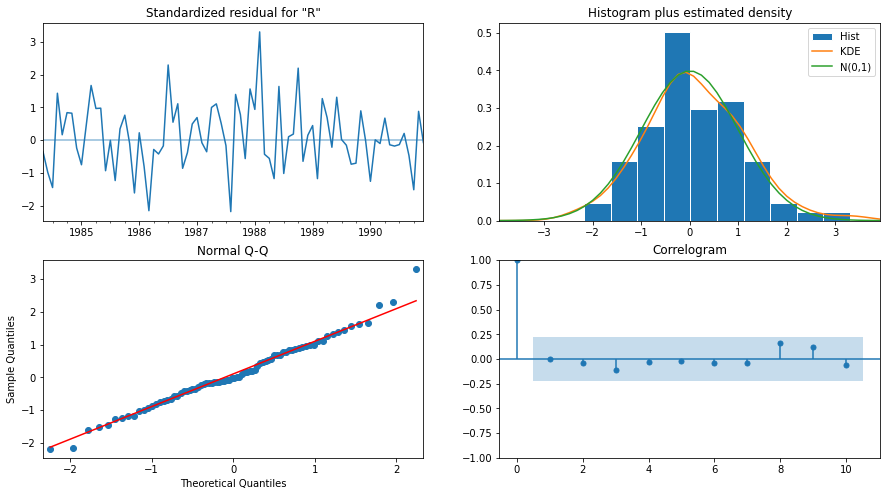

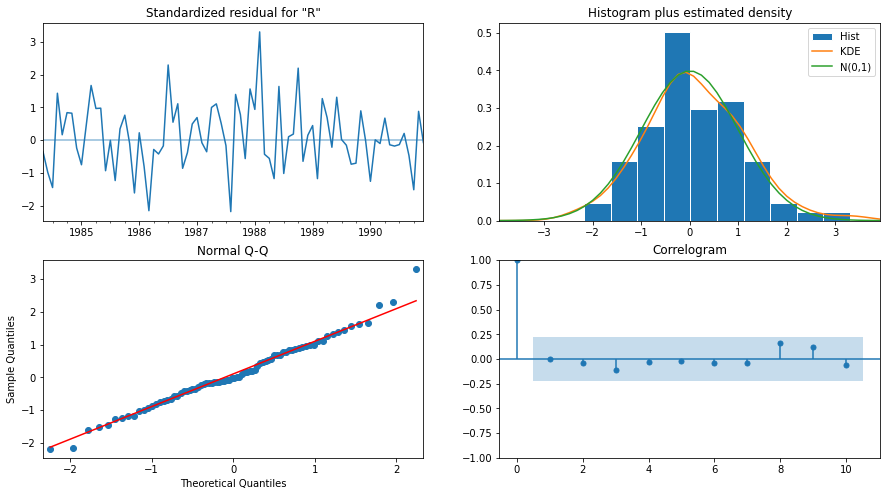

In [150]:
result_auto_SARIMA.plot_diagnostics()

In [151]:
predicted_auto_SARIMA=result_auto_SARIMA.get_forecast(steps=len(test))

In [152]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,47.582387,15.746449,16.719915,78.444859
1991-02-28,68.165036,16.000519,36.804595,99.525476
1991-03-31,68.935949,16.004469,37.567766,100.304132
1991-04-30,70.127363,16.134995,38.503355,101.751372
1991-05-31,61.437950,16.148931,29.786628,93.089273


In [153]:
rmse=mean_squared_error(test["Rose"],predicted_auto_SARIMA.predicted_mean, squared=False)
mape=mean_absolute_percentage_error(test["Rose"], predicted_auto_SARIMA.predicted_mean)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 18.17664099414602 
MAPE: 28.46879990189667


In [154]:
temp_result=pd.DataFrame({"RMSE": rmse, "MAPE":mape}
                     ,index=["SARIMA(3,1,3)(3,2,0,23)"])
result_2=pd.concat([result_2,temp_result])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",36.765572,75.663870
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,3)(3,2,0,23)",18.176641,28.468800


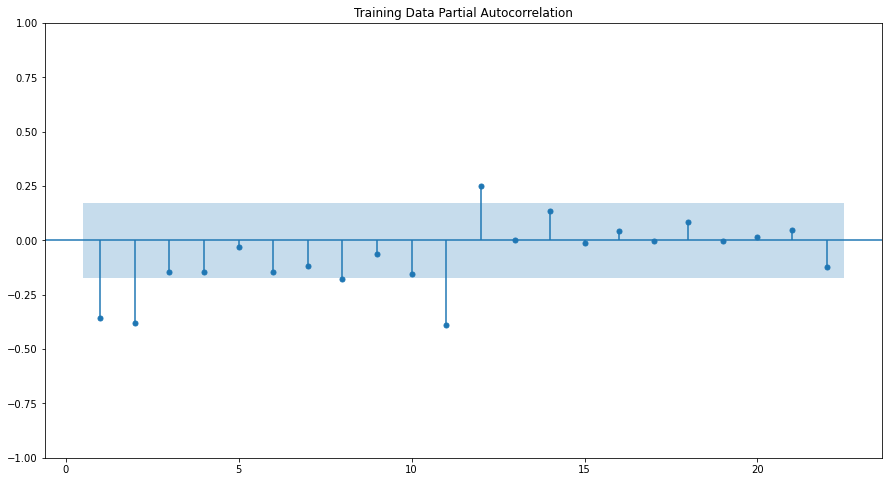

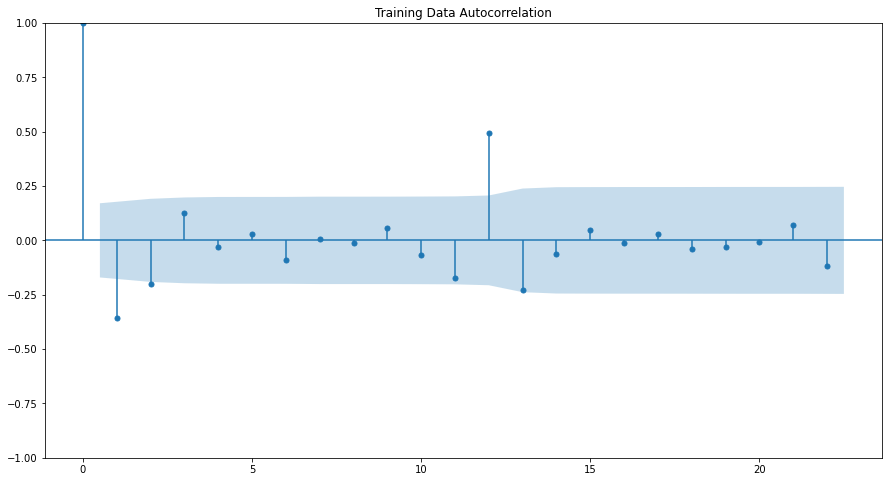

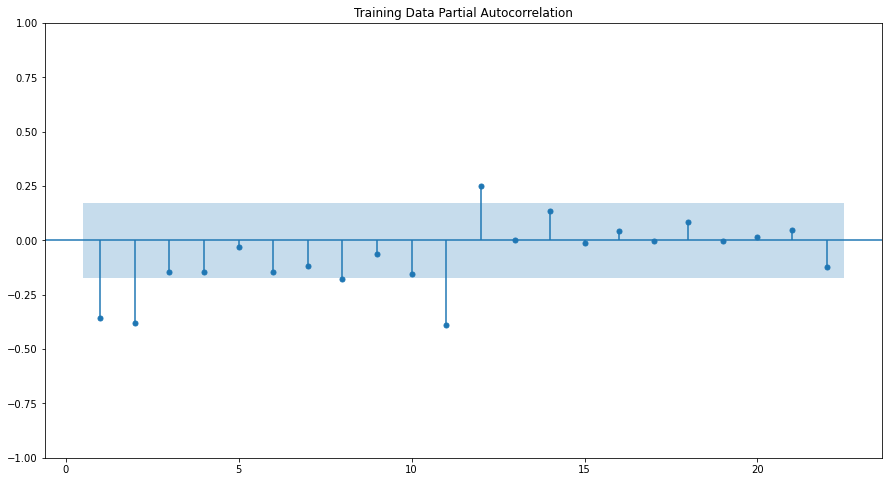

In [155]:
plot_acf(train.diff(),title="Training Data Autocorrelation", missing="drop")
plot_pacf(train.diff().dropna(),title="Training Data Partial Autocorrelation", zero=False, method="ywmle")

In [156]:
manual_SARIMA=sm.tsa.statespace.SARIMAX(train["Rose"],
                                              order=(3,1,1), seasonal_order=(1,1,2,12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
result_manual_SARIMA=manual_SARIMA.fit(maxiter=1000)
print(result_manual_SARIMA.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -390.403
Date:                                 Thu, 02 Nov 2023   AIC                            796.807
Time:                                         10:45:58   BIC                            817.067
Sample:                                     01-31-1980   HQIC                           804.987
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0588      0.127      0.463      0.643      -0.190       0

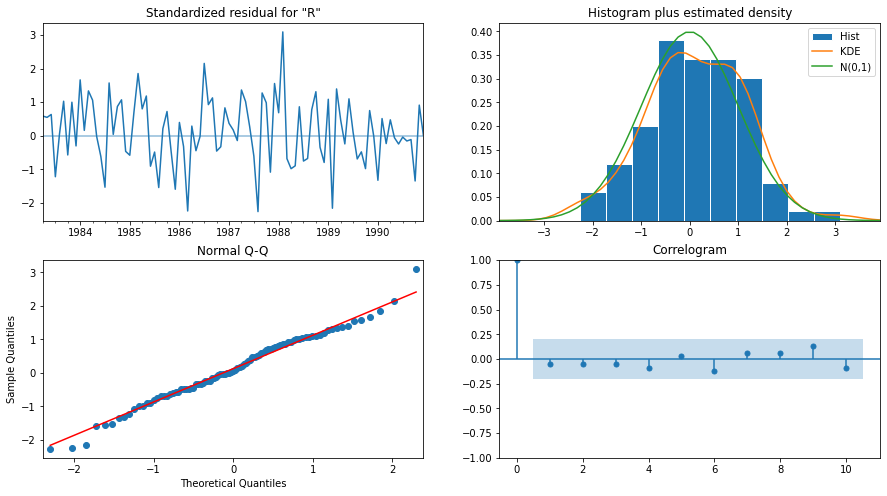

In [157]:
result_manual_SARIMA.plot_diagnostics()
plt.show()

In [158]:
predicted_manual_SARIMA=result_manual_SARIMA.get_forecast(steps=len(test))

In [159]:
rmse=mean_squared_error(test["Rose"],predicted_manual_SARIMA.predicted_mean, squared=False)
mape=mean_absolute_percentage_error(test["Rose"], predicted_manual_SARIMA.predicted_mean)
print("RMSE:",rmse,"\nMAPE:",mape)

RMSE: 15.709176979608985 
MAPE: 23.157836234051


In [160]:
temp_result=pd.DataFrame({"RMSE": [rmse], "MAPE":mape}
                     ,index=["SARIMA(3,1,3)(3,1,2,12)"])
result_2=pd.concat([result_2,temp_result])
result_2

,RMSE,MAPE
"ARIMA(2,1,2)",36.765572,75.663870
"ARIMA(3,1,3)",36.650007,75.356651
"SARIMA(3,1,3)(3,2,0,23)",18.176641,28.468800
"SARIMA(3,1,3)(3,1,2,12)",15.709177,23.157836


In [161]:
full_data_model=sm.tsa.statespace.SARIMAX(df["Rose"],
                                              order=(3,1,3), seasonal_order=(3,1,2,12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
result_full_data_model=full_data_model.fit(maxiter=1000)
print(result_full_data_model.summary())

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -537.506
Date:                                 Thu, 02 Nov 2023   AIC                           1099.011
Time:                                         10:46:14   BIC                           1133.875
Sample:                                     01-31-1980   HQIC                          1113.179
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7881      0.113    -15.882      0.000      -2.009      -1

In [162]:
predicted_manual_SARIMA_full_data=result_full_data_model.get_forecast(steps=len(test))

In [163]:
pred_full_manual_SARIMA_date=predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.260259,12.574855,21.613997,70.906522
1995-09-30,44.098588,12.816513,18.978684,69.218492
1995-10-31,46.405317,12.870838,21.178939,71.631695
1995-11-30,59.352181,12.933624,34.002744,84.701618
1995-12-31,85.661397,12.984919,60.211423,111.111371


In [164]:
rmse=mean_squared_error(df["Rose"],result_full_data_model.fittedvalues, squared=False)
print("RMSE of the full model", rmse)

RMSE of the full model 48.072938117708134


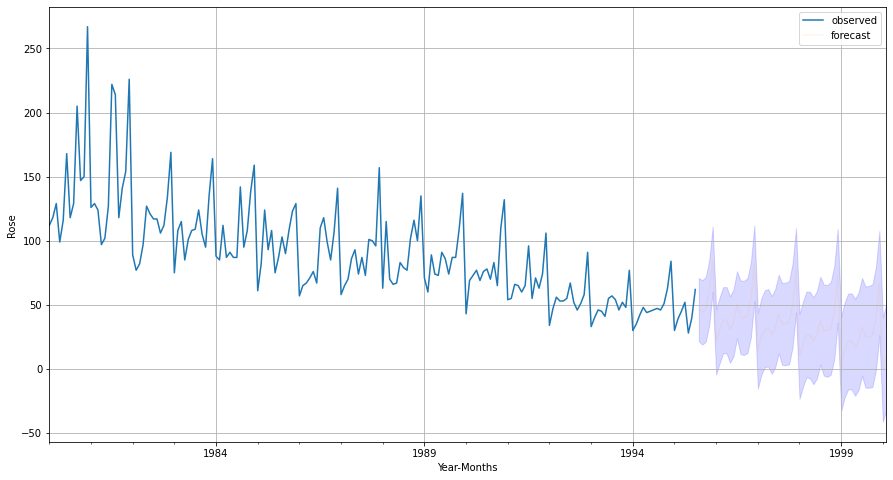

In [166]:
axis=df["Rose"].plot(label="observed")
pred_full_manual_SARIMA_date["mean"].plot(ax=axis, label="forecast",alpha=0.07)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date["mean_ci_lower"],
                 pred_full_manual_SARIMA_date["mean_ci_upper"], color="blue", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose")
plt.legend(loc="best")
plt.grid()

Text(0.5, 1.0, 'Rose: 12 Months forecast')

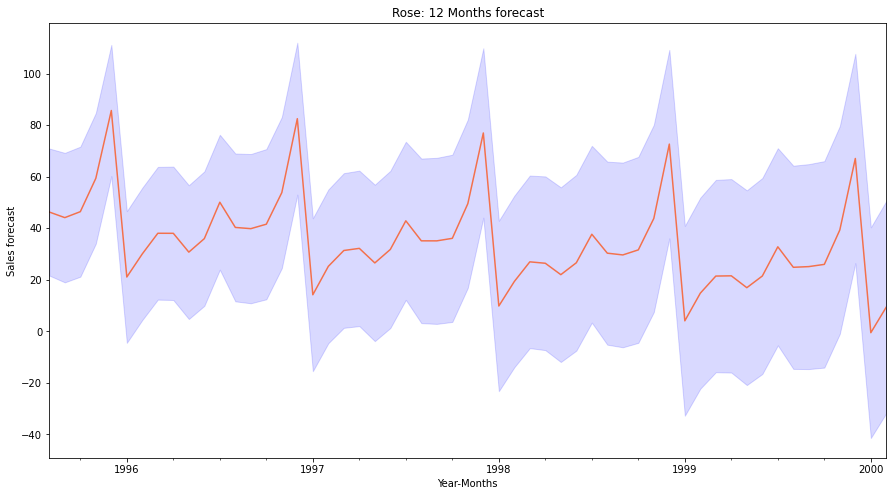

In [167]:
axis=pred_full_manual_SARIMA_date["mean"].plot(alpha=0.7, color="orangered")
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date["mean_ci_lower"],
                 pred_full_manual_SARIMA_date["mean_ci_upper"], color="blue", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sales forecast")
plt.title("Rose: 12 Months forecast", fontsize=12)

In [168]:
forecast=pd.DataFrame({"Rose":np.round(pred_full_manual_SARIMA_date["mean"], 2)})

In [169]:
forecast

,Rose
1995-08-31,46.26
1995-09-30,44.10
1995-10-31,46.41
1995-11-30,59.35
1995-12-31,85.66
1996-01-31,21.06
1996-02-29,30.04
1996-03-31,38.03
1996-04-30,38.01
1996-05-31,30.71


In [ ]:
np.sum(forecast["Rose"])

In [ ]:
forecast.describe()

In [ ]:
result_2

In [ ]:
result_1=pd.concat({result_2, result_1})
result_1